In [1]:
#import 
import pandas as pd
import numpy as np
import re
from pathlib import Path
import json
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter
%matplotlib inline

In [2]:
#export 
warehouse_path = Path("/projects/public_warehouse/bids_warehouse/")

In [3]:
paths = Path(".").glob("*filtered.1D")

In [5]:
def get_file(file):
    return np.genfromtxt(file)
def get_file_info(file):
    name = Path(file).name
    a_number, visit, imtype, _ = re.match(r"(sub-A000\d\d\d\d\d)_(ses-\w+)_task-rest_(acq-\d+)_bold_full(_filtered)?.1D", name).groups()
    phys_path = warehouse_path/a_number/visit/"func"/"{}_{}_task-rest_{}_physio.tsv.gz".format(a_number, visit, imtype)
    json_path = warehouse_path/a_number/visit/"func"/"{}_{}_task-rest_{}_physio.json".format(a_number, visit, imtype)
    return phys_path, json_path
def get_resp(phys_path, json_path, max_length):
    with open(json_path) as f:
        j = json.load(f)
    resp = np.genfromtxt(phys_path)[:, j["Columns"].index("respiratory")][:max_length]
    return resp
def downsample_resp(resp, length):
    resp_resampled = signal.resample(resp, length)
    #step = len(resp)//length
    #resp_resampled = []
    #for i in range(length):
    #    resp_resampled.append(np.median(resp[i*step:(i*step)+step]))
    return np.array(resp_resampled)
def extract_max_freq(resp_trace, sampling_rate):
    fourier_transform = np.fft.rfft(resp_trace)
    abs_fourier_transform = np.abs(fourier_transform)
    power_spectrum = np.square(abs_fourier_transform)
    frequency = np.linspace(0, sampling_rate/2, len(power_spectrum))
    assert len(power_spectrum) == len(frequency)
    plt.plot(frequency, power_spectrum)
    plt.xlim(0, 1)
    plt.show()
    return frequency[np.argmax(power_spectrum)]

In [6]:
#export 
def butter_bandpass(lowcut, highcut, fs, order=3):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=3):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def filter_frequency(data):
    return butter_bandpass_filter(data, 0.15, 0.5, 62.5)

In [7]:
from scipy import signal

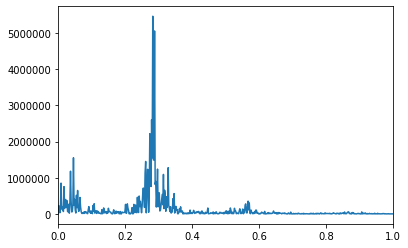

0.2828854314002829


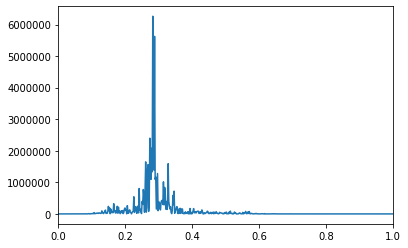

0.2828854314002829


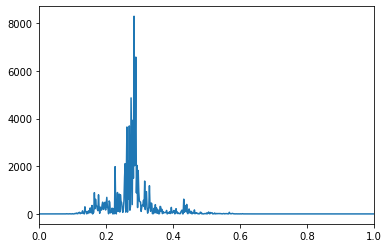

0.2828854314002829


array([[ 1.        , -0.73706838],
       [-0.73706838,  1.        ]])

In [8]:
file = next(paths)
filtered = get_file(file)
phys_path, json_path = get_file_info(file)
resp = get_resp(phys_path, json_path, 35350)
max_freq = extract_max_freq(resp - resp.mean(), 62.5); print(max_freq)
filtered_freq = filter_frequency(resp)
max_freq = extract_max_freq(filtered_freq, 62.5); print(max_freq)
resp_resampled = downsample_resp(filtered_freq, len(filtered))
filt_movement = butter_bandpass_filter(filtered[:, -1], 0.15, 0.5, 1/0.0875)
max_freq = extract_max_freq(filt_movement, 1/0.0875); print(max_freq)
np.corrcoef(resp_resampled, filt_movement)

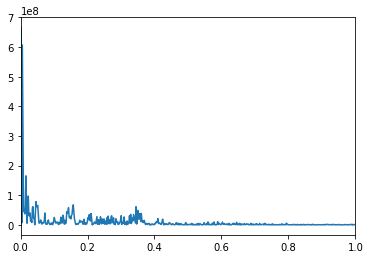

0.001768033946251768


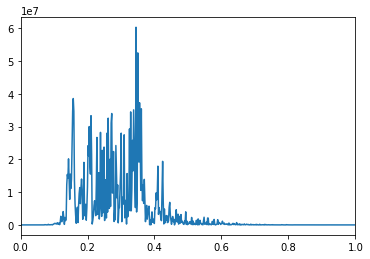

0.34476661951909476


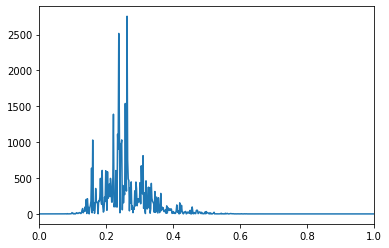

0.2616690240452617


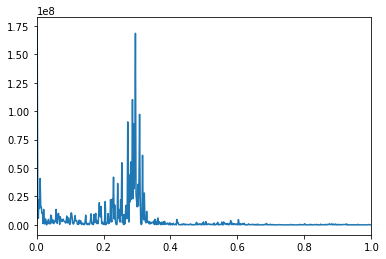

0.001768033946251768


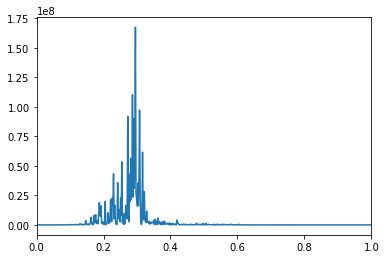

0.29526166902404527


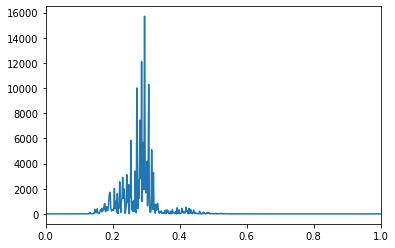

0.29526166902404527


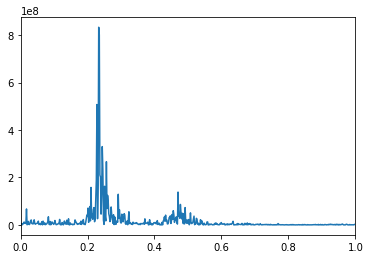

0.23338048090523336


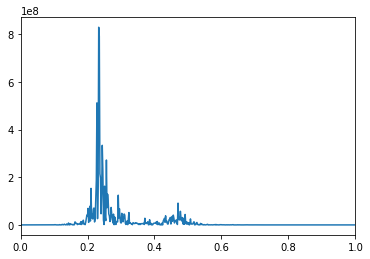

0.23338048090523336


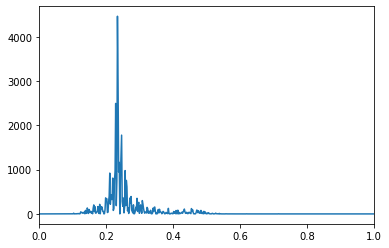

0.2333804809052334


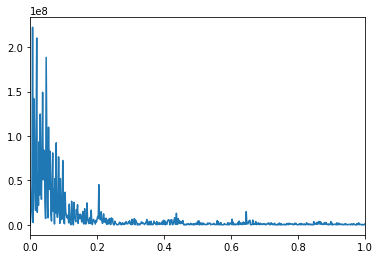

0.007072135785007072


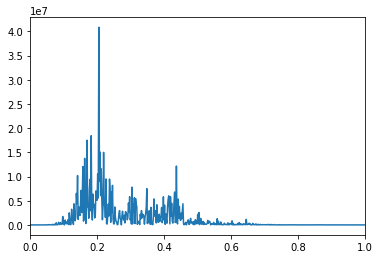

0.20509193776520507


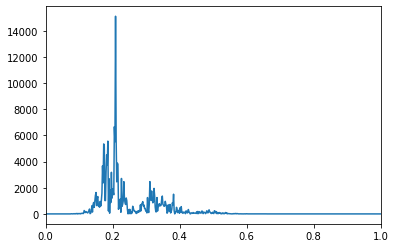

0.20862800565770864


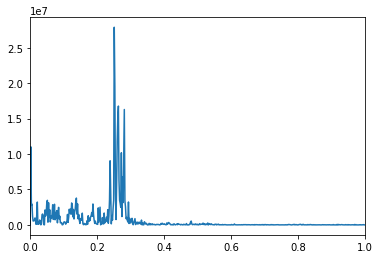

0.25106082036775107


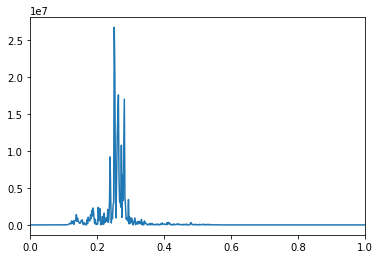

0.25106082036775107


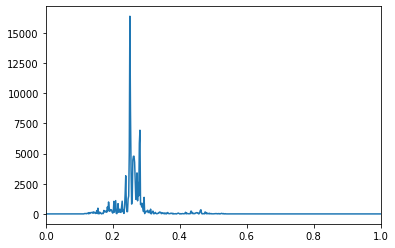

0.25106082036775107


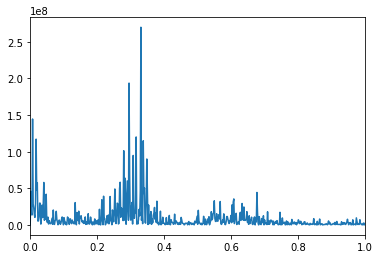

0.33062234794908063


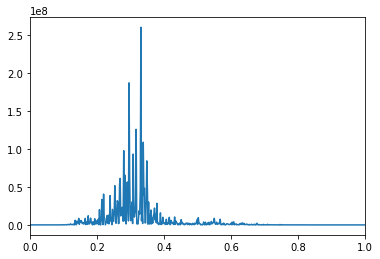

0.33062234794908063


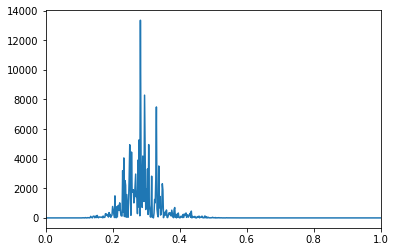

0.2828854314002829


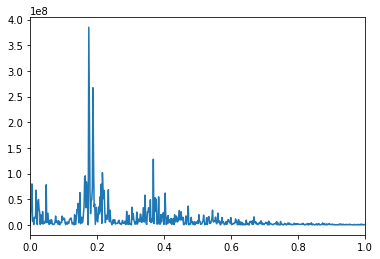

0.17503536067892503


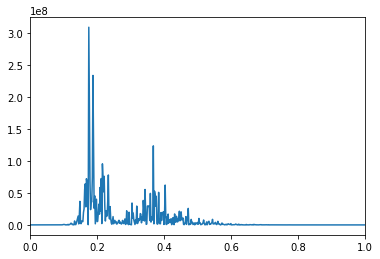

0.17503536067892503


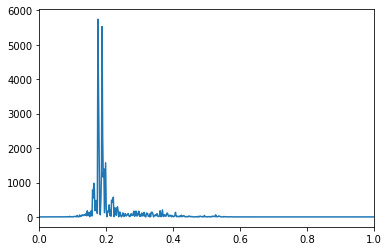

0.17503536067892506


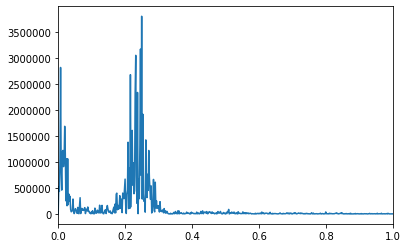

0.24929278642149927


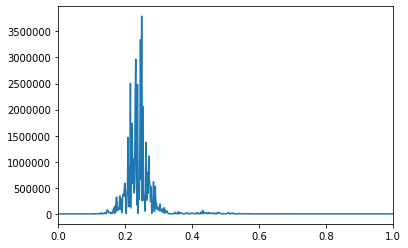

0.24929278642149927


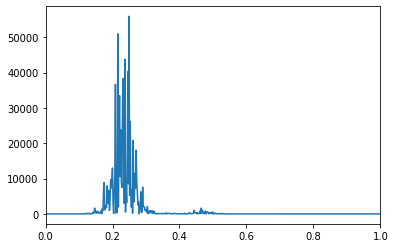

0.2492927864214993


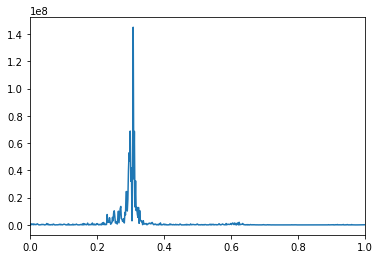

0.3076379066478076


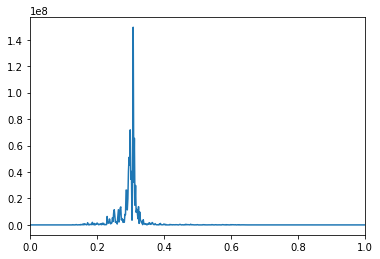

0.3076379066478076


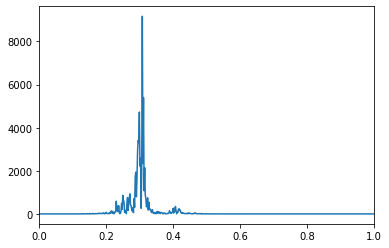

0.30763790664780766


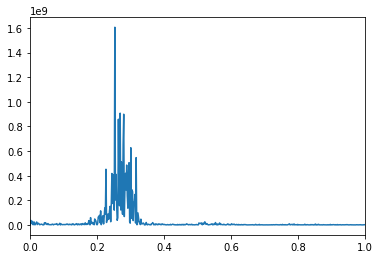

0.2528288543140028


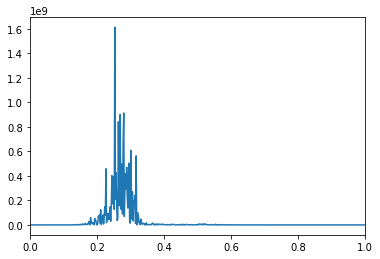

0.2528288543140028


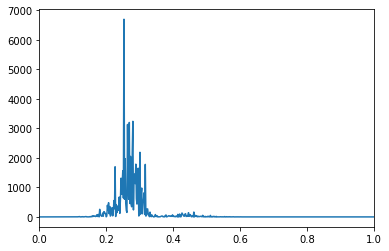

0.25282885431400287


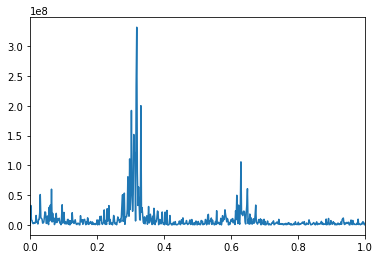

0.31824611032531824


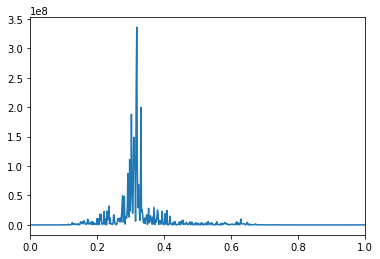

0.31824611032531824


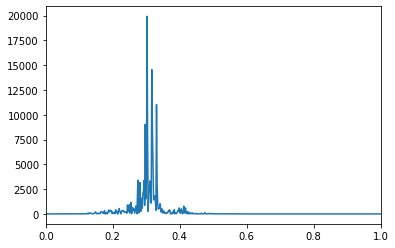

0.30233380480905236


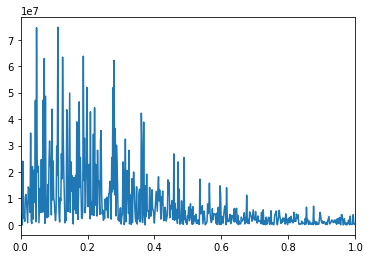

0.11138613861386137


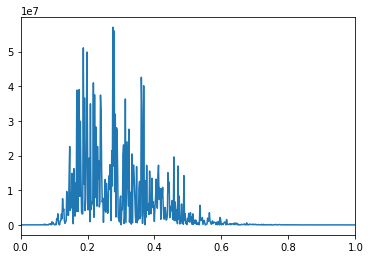

0.2758132956152758


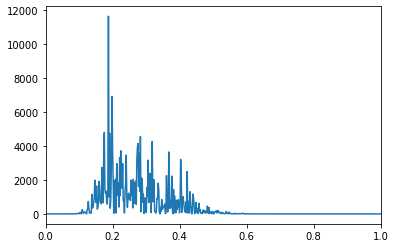

0.18741159830268742


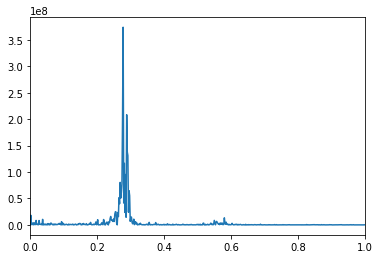

0.2775813295615276


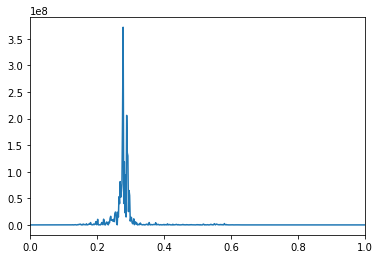

0.2775813295615276


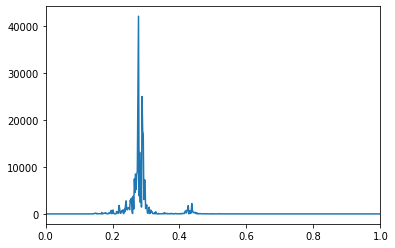

0.2775813295615276


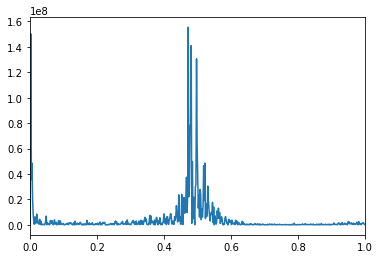

0.472065063649222


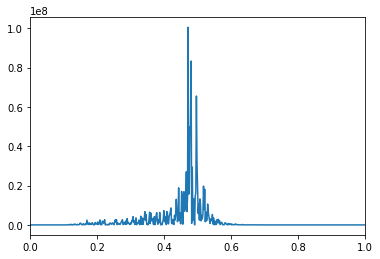

0.472065063649222


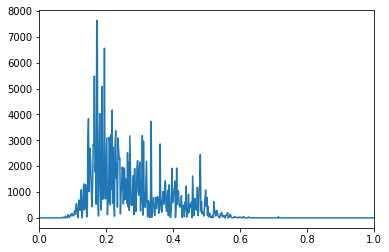

0.1714992927864215


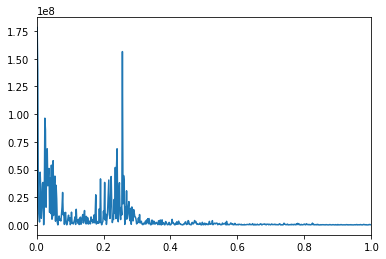

0.001768033946251768


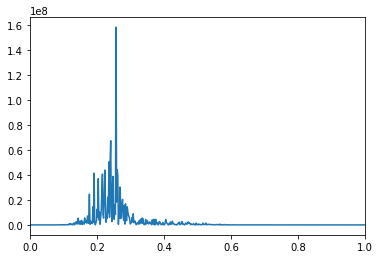

0.25636492220650636


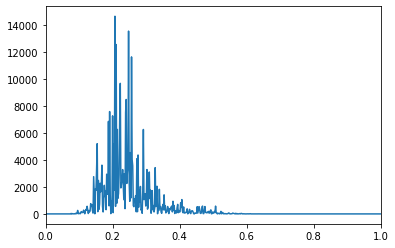

0.20685997171145687


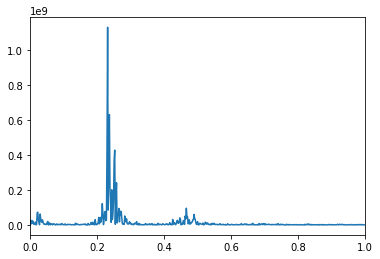

0.2316124469589816


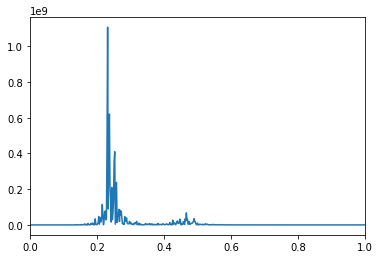

0.2316124469589816


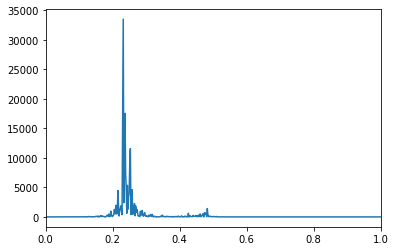

0.23161244695898162


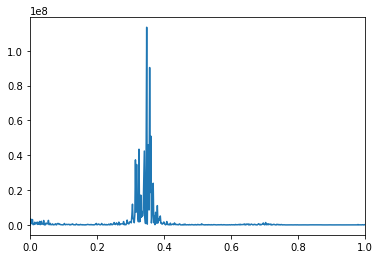

0.34830268741159826


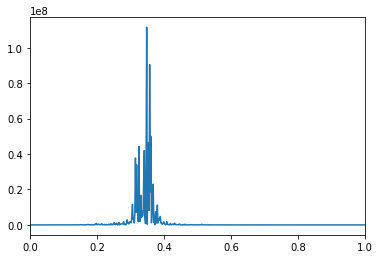

0.34830268741159826


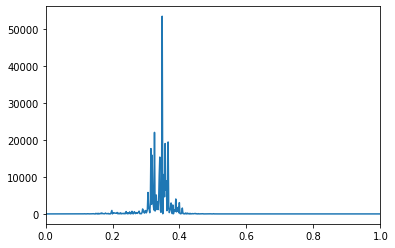

0.3483026874115983


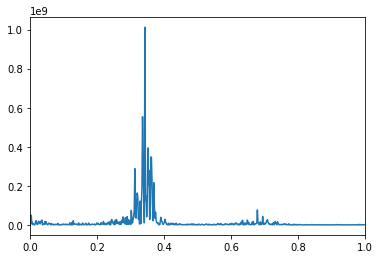

0.34299858557284296


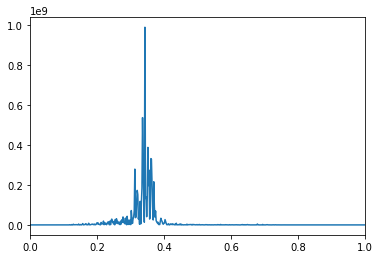

0.34299858557284296


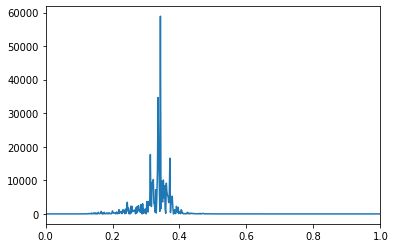

0.342998585572843


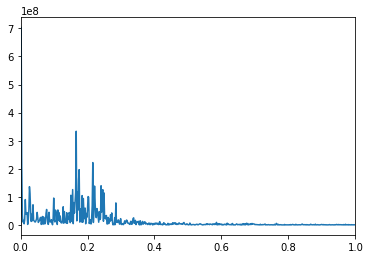

0.001768033946251768


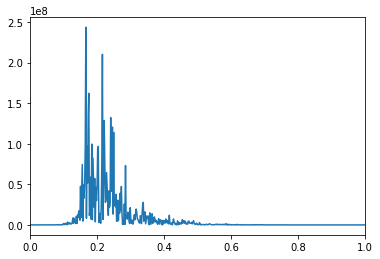

0.1661951909476662


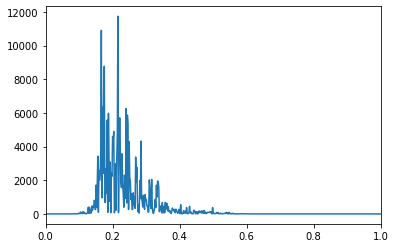

0.2157001414427157


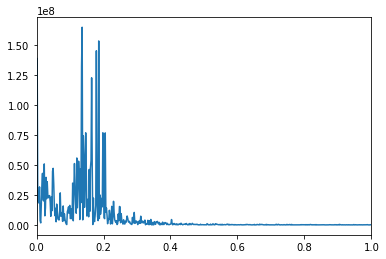

0.13613861386138612


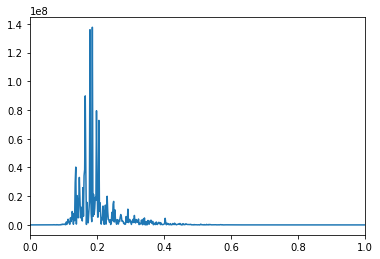

0.18564356435643564


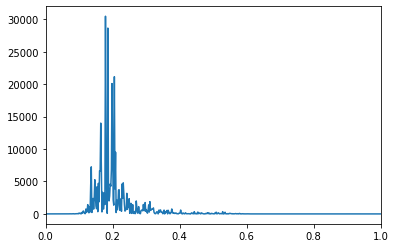

0.17857142857142858


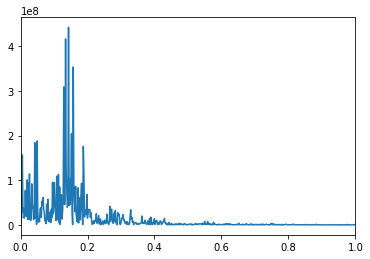

0.14321074964639322


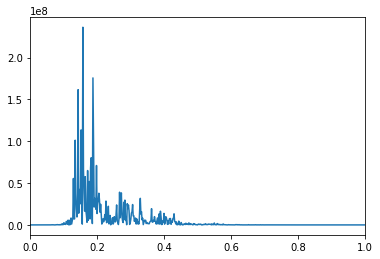

0.15735502121640735


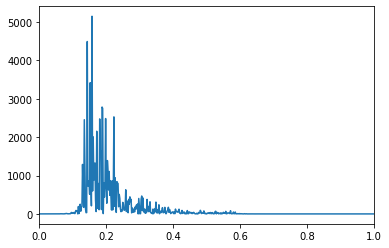

0.15735502121640738


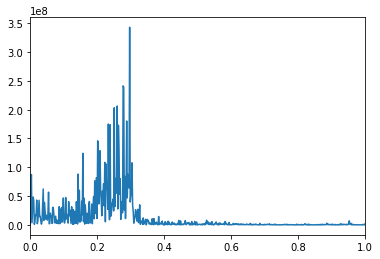

0.297029702970297


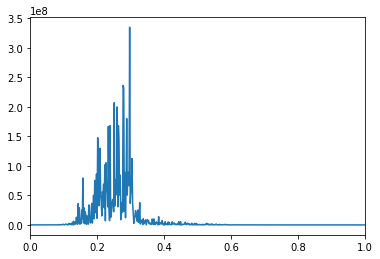

0.297029702970297


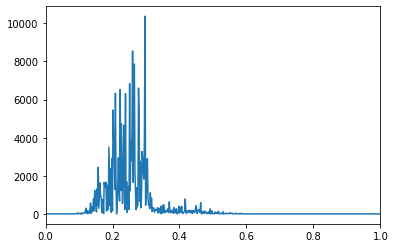

0.29702970297029707


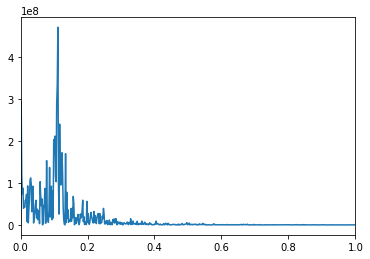

0.11138613861386137


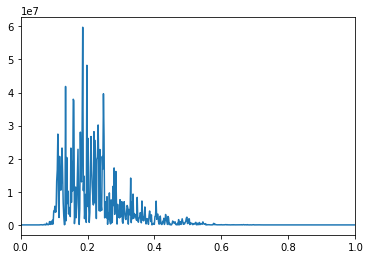

0.18564356435643564


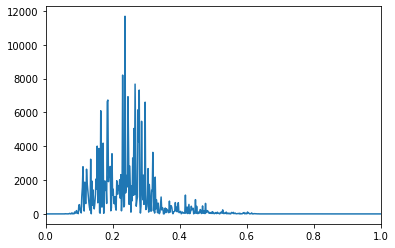

0.23691654879773694


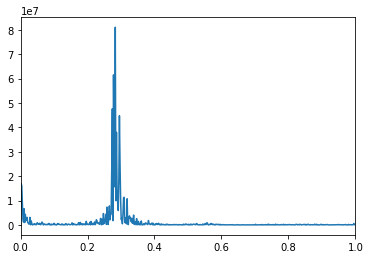

0.2828854314002829


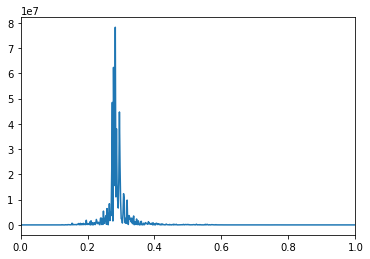

0.2828854314002829


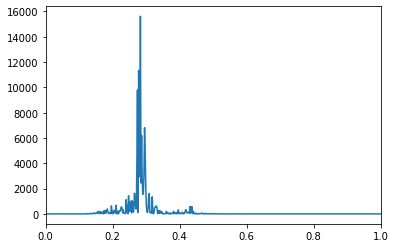

0.2828854314002829


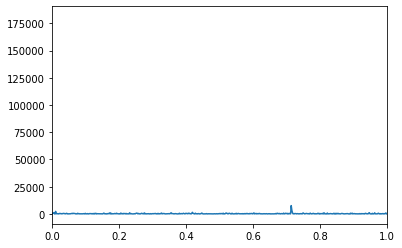

25.0


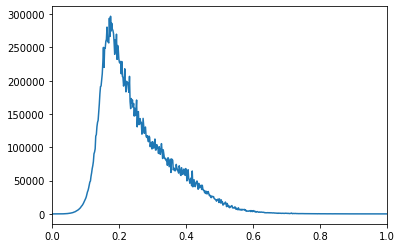

0.17503536067892503


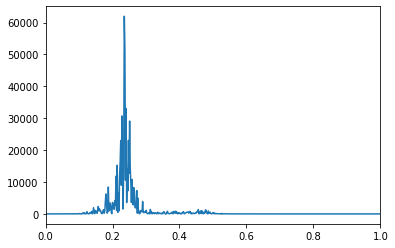

0.23514851485148516


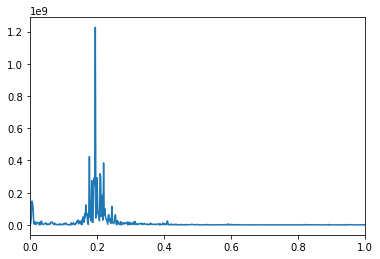

0.19448373408769448


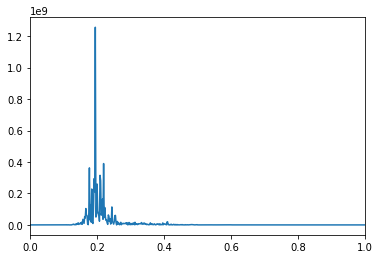

0.19448373408769448


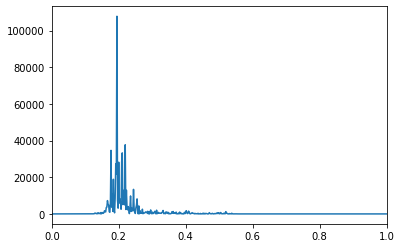

0.1944837340876945


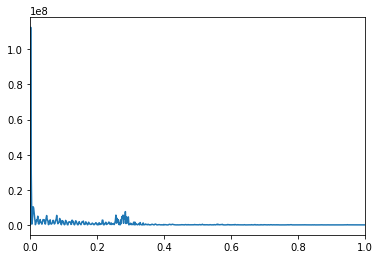

0.001768033946251768


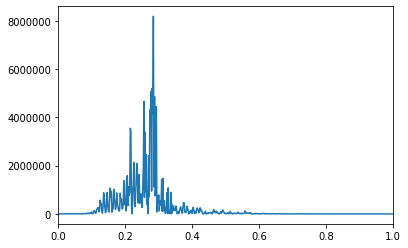

0.28465346534653463


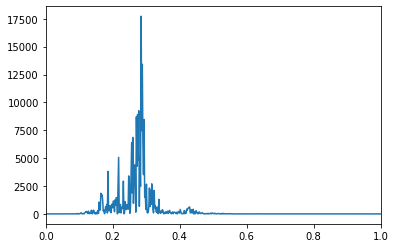

0.2846534653465347


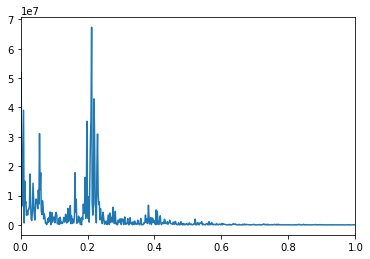

0.21216407355021216


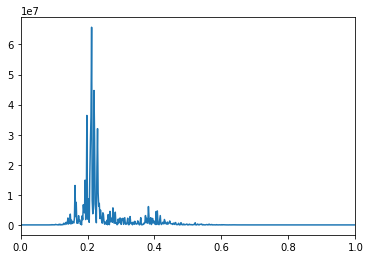

0.21216407355021216


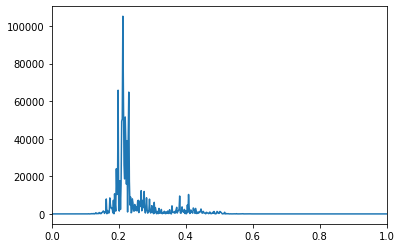

0.2121640735502122


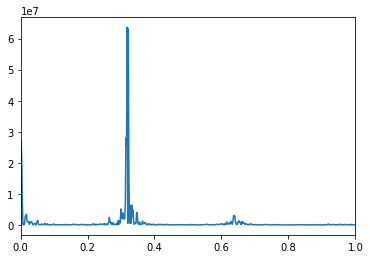

0.31824611032531824


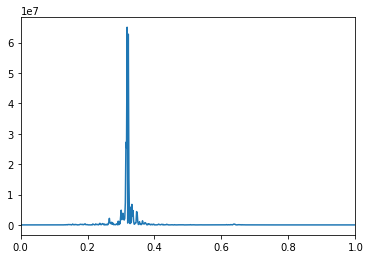

0.31824611032531824


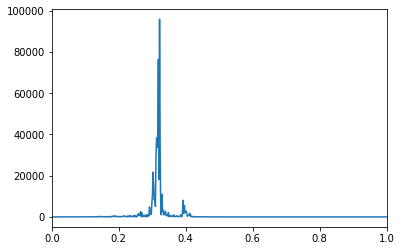

0.3217821782178218


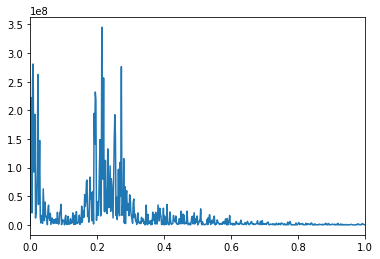

0.2139321074964639


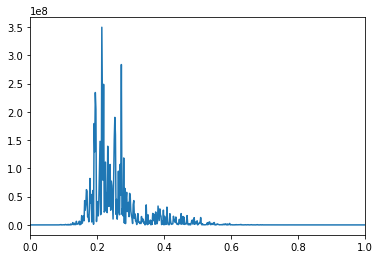

0.2139321074964639


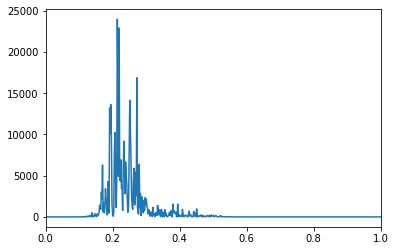

0.21393210749646394


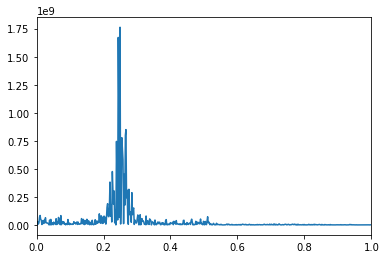

0.24929278642149927


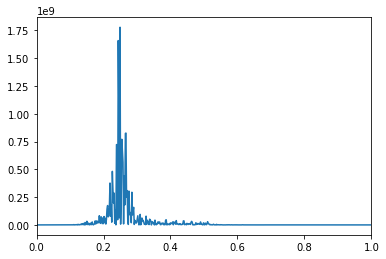

0.24929278642149927


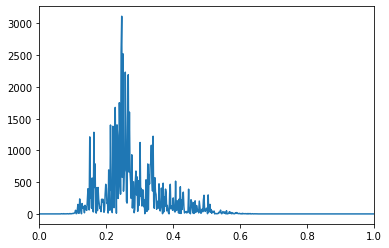

0.24575671852899578


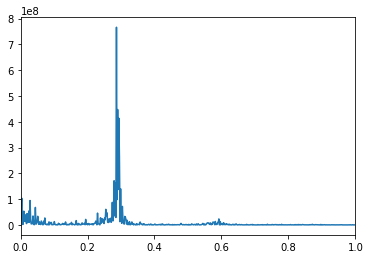

0.28642149929278643


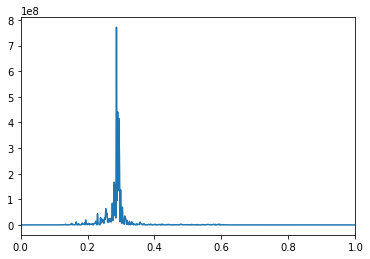

0.28642149929278643


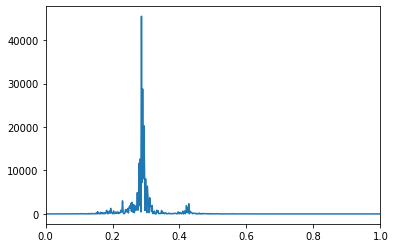

0.28642149929278643


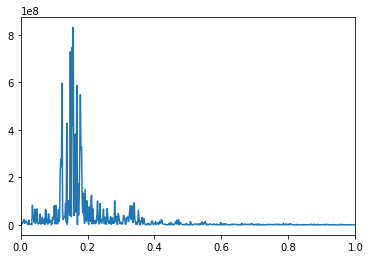

0.15735502121640735


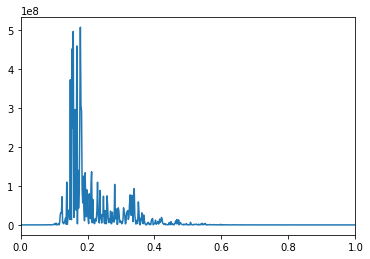

0.17857142857142855


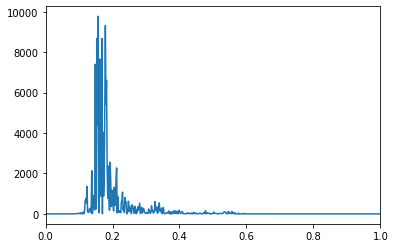

0.15735502121640738


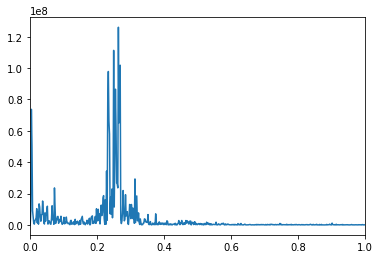

0.2634370579915134


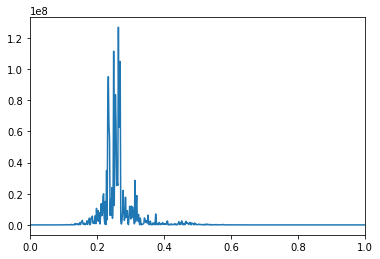

0.2634370579915134


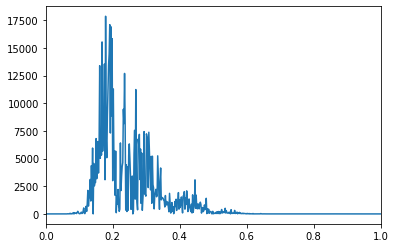

0.17857142857142858


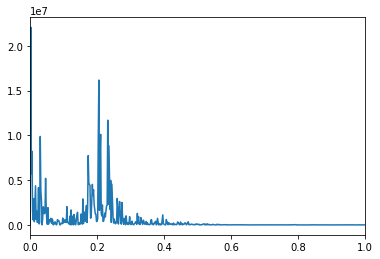

0.001768033946251768


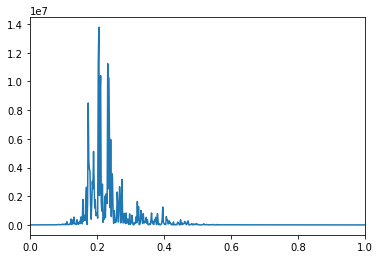

0.20509193776520507


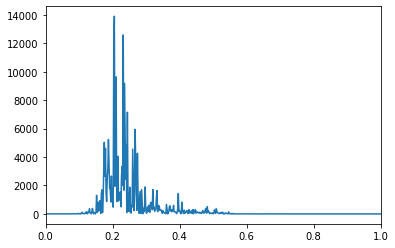

0.2050919377652051


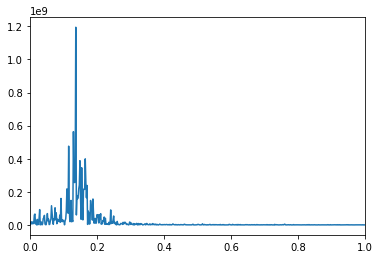

0.13613861386138612


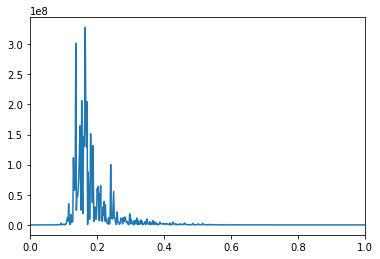

0.16442715700141441


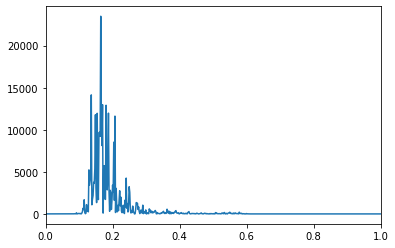

0.16442715700141444


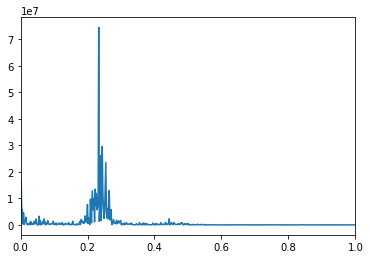

0.23338048090523336


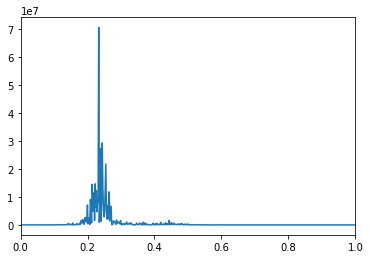

0.23338048090523336


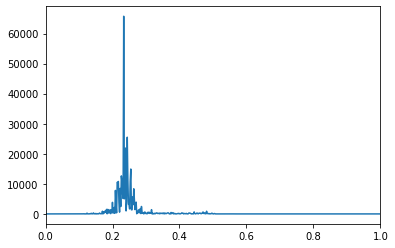

0.2333804809052334


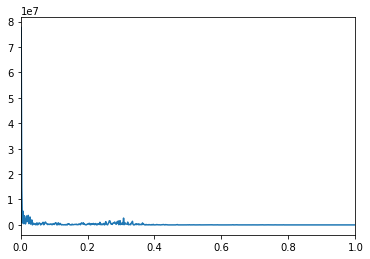

0.001768033946251768


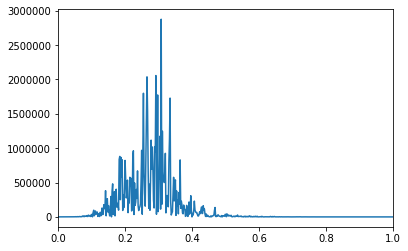

0.3076379066478076


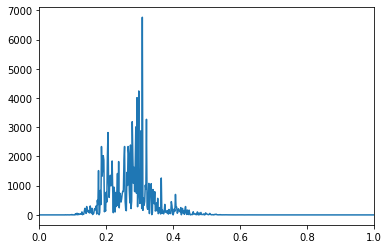

0.30763790664780766


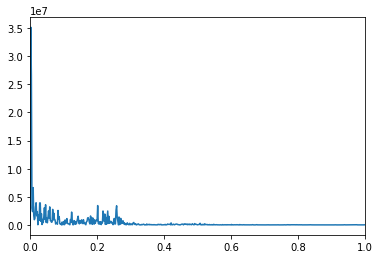

0.001768033946251768


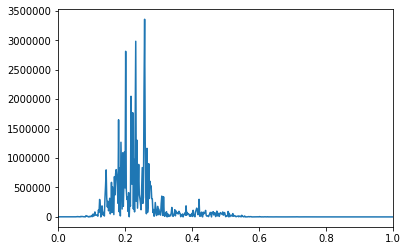

0.2581329561527581


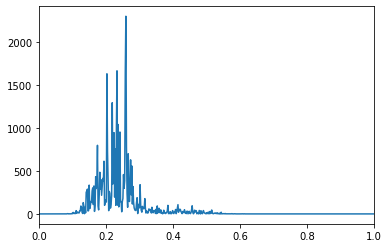

0.25813295615275816


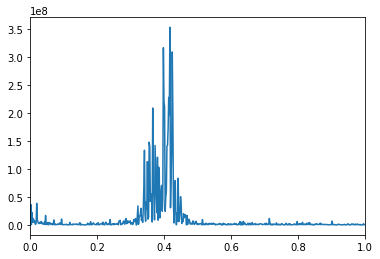

0.41725601131541723


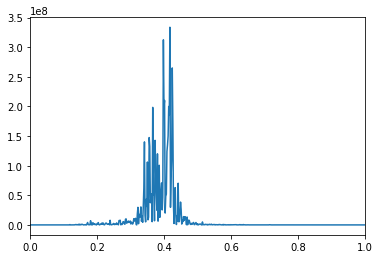

0.41725601131541723


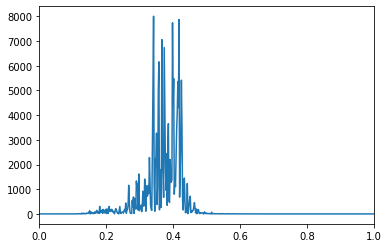

0.34123055162659127


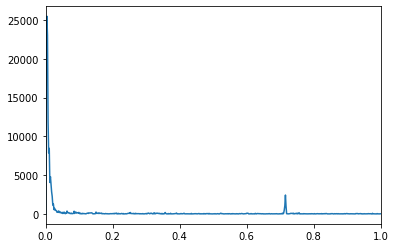

0.003536067892503536


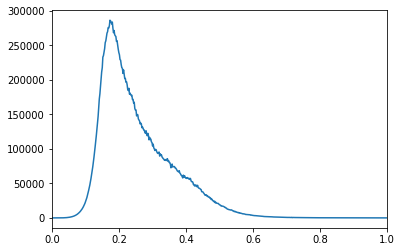

0.17326732673267325


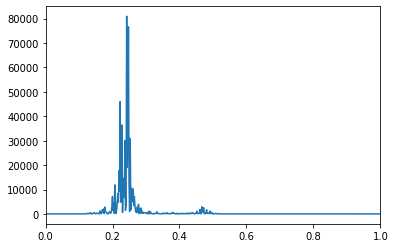

0.24222065063649223


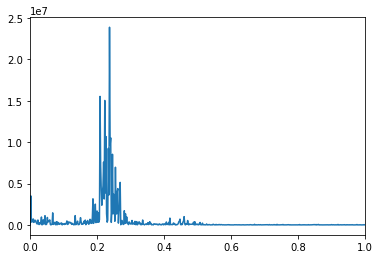

0.2369165487977369


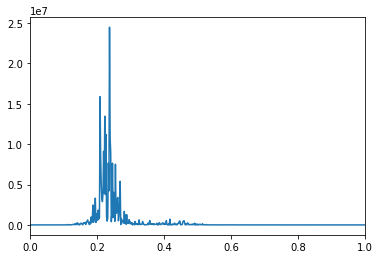

0.2369165487977369


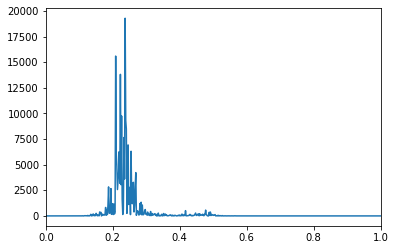

0.23691654879773694


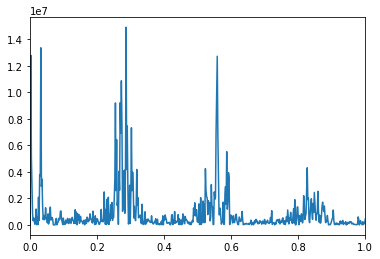

0.28642149929278643


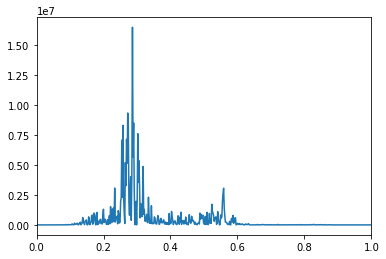

0.28642149929278643


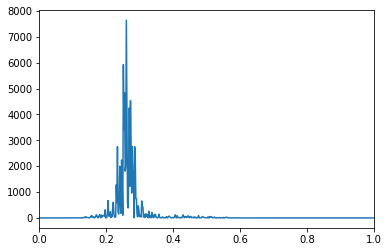

0.2599009900990099


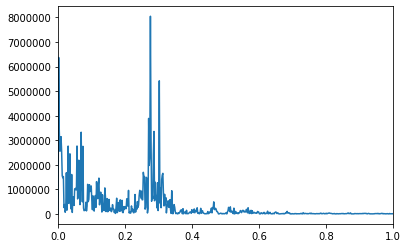

0.2758132956152758


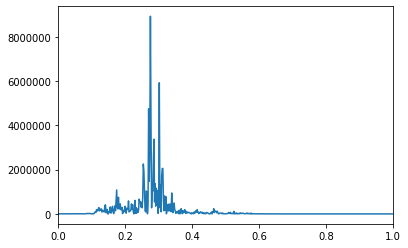

0.2758132956152758


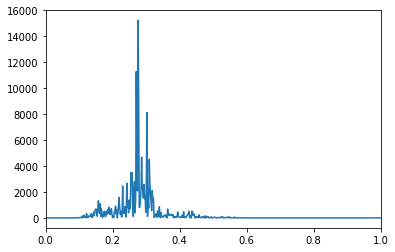

0.27581329561527584


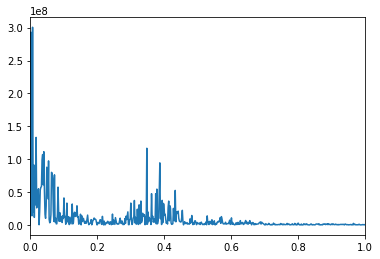

0.007072135785007072


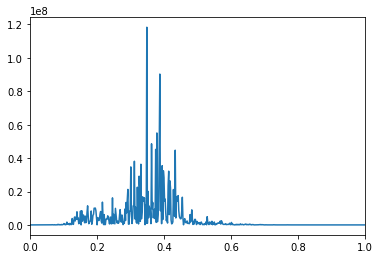

0.34830268741159826


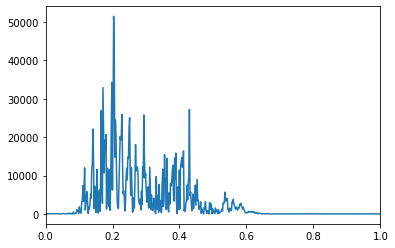

0.20332390381895335


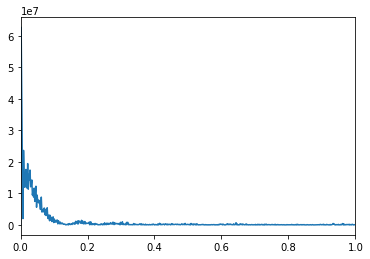

0.001768033946251768


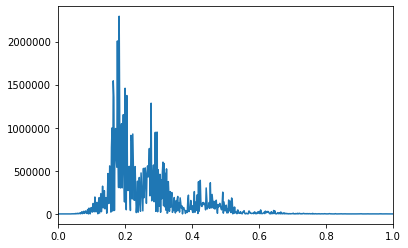

0.1821074964639321


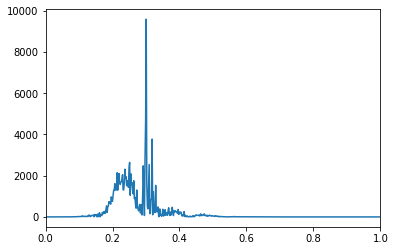

0.30056577086280056


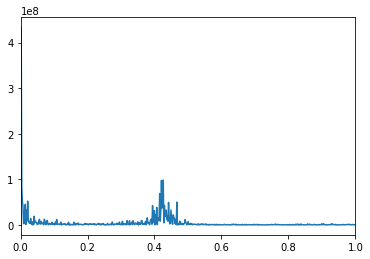

0.001768033946251768


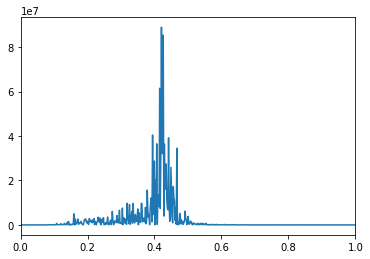

0.4207920792079208


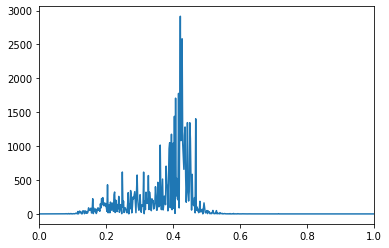

0.42079207920792083


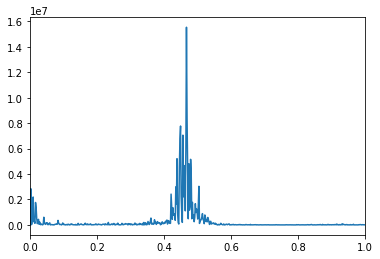

0.4667609618104667


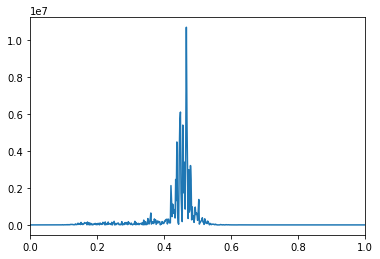

0.4667609618104667


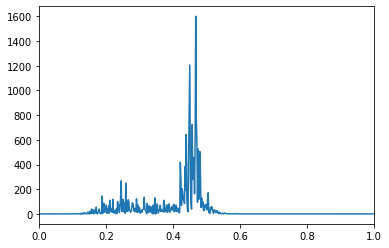

0.4667609618104668


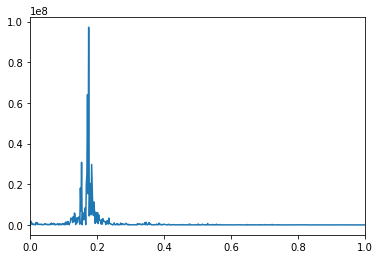

0.17503536067892503


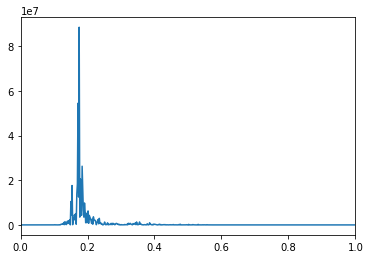

0.17503536067892503


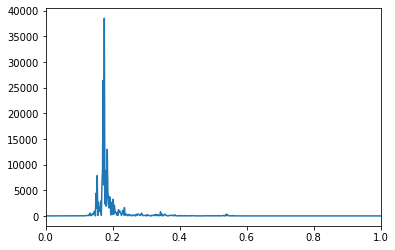

0.17503536067892506


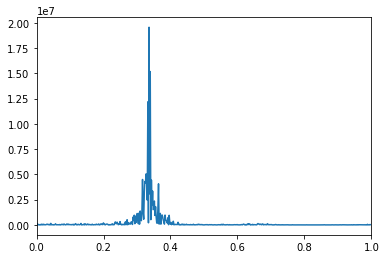

0.3359264497878359


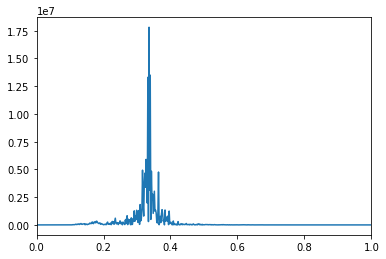

0.3359264497878359


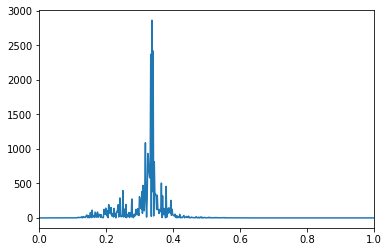

0.3359264497878359


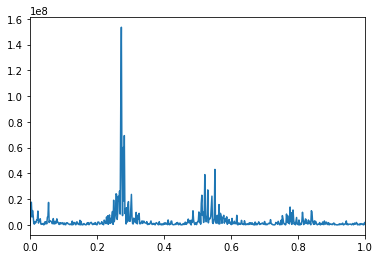

0.27227722772277224


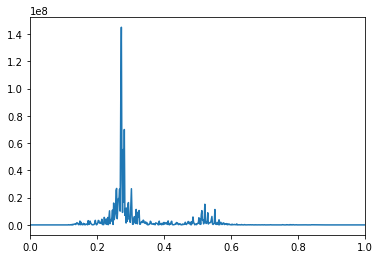

0.27227722772277224


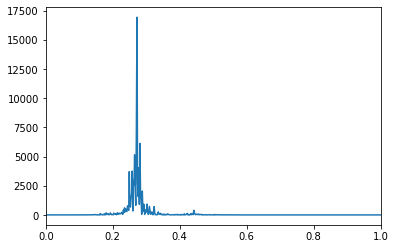

0.2722772277227723


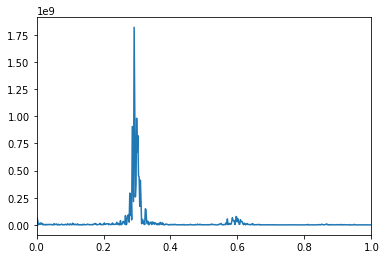

0.29144885351075206


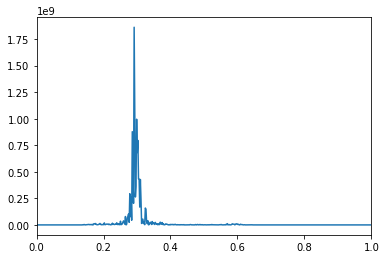

0.29144885351075206


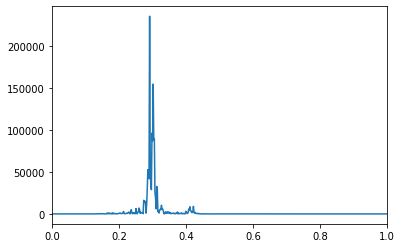

0.2917256011315417


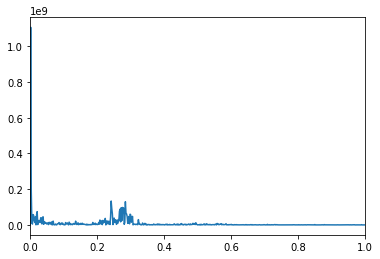

0.001768033946251768


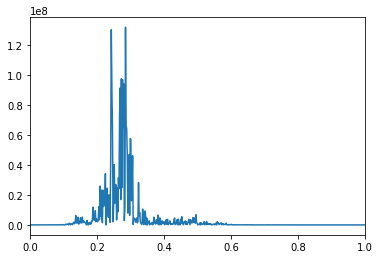

0.28465346534653463


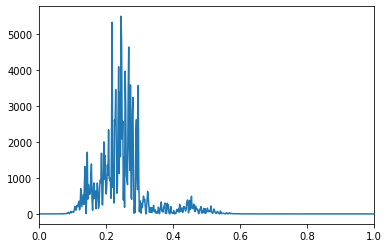

0.243988684582744


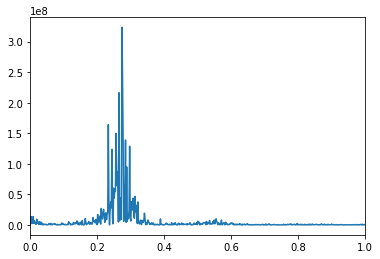

0.27404526166902404


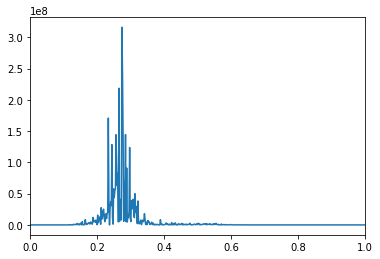

0.27404526166902404


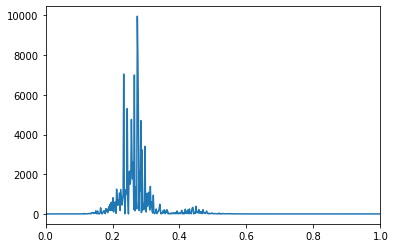

0.27404526166902404


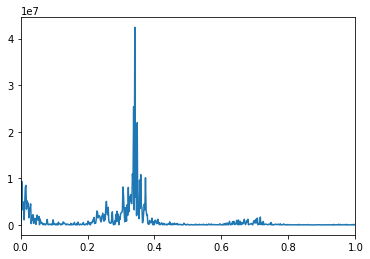

0.3412305516265912


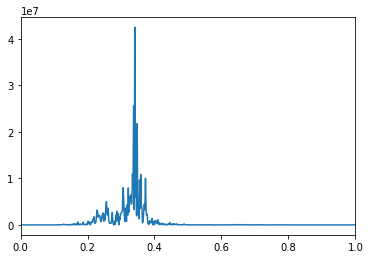

0.3412305516265912


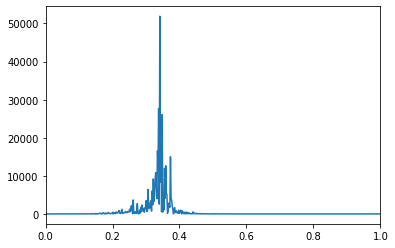

0.34123055162659127


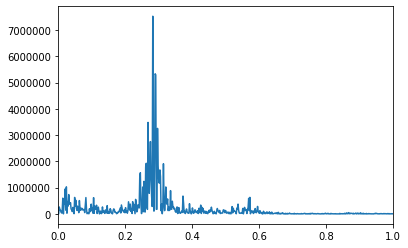

0.2828854314002829


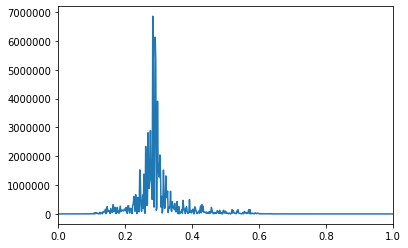

0.2828854314002829


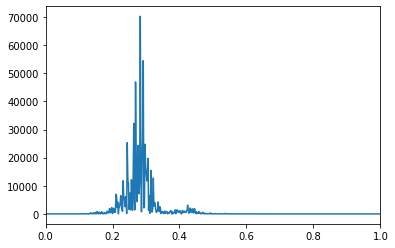

0.2828854314002829


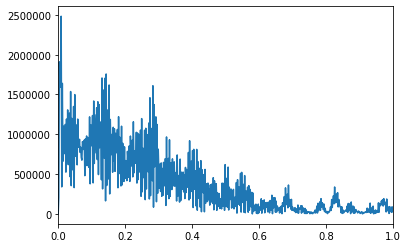

0.00884016973125884


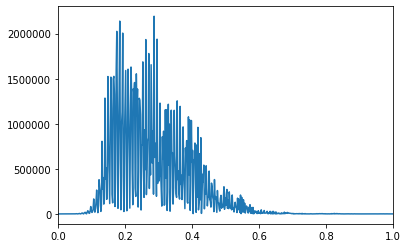

0.28642149929278643


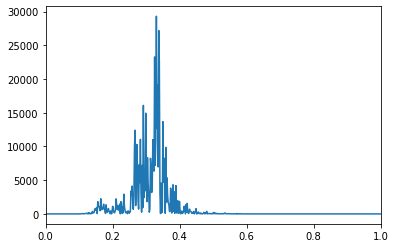

0.33062234794908063


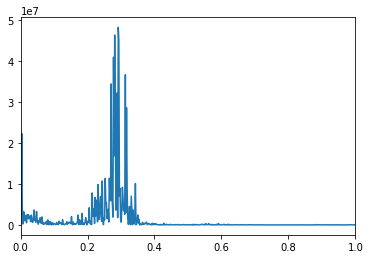

0.2917256011315417


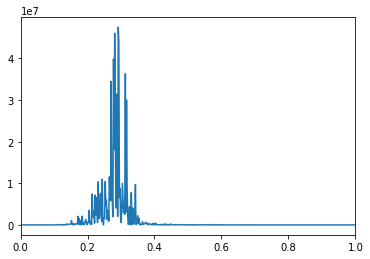

0.2917256011315417


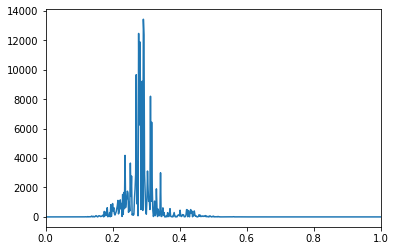

0.2917256011315417


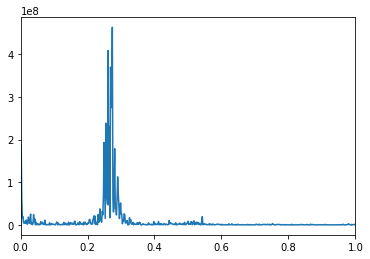

0.27404526166902404


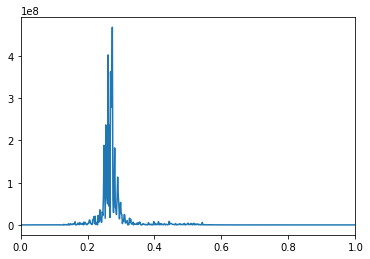

0.27404526166902404


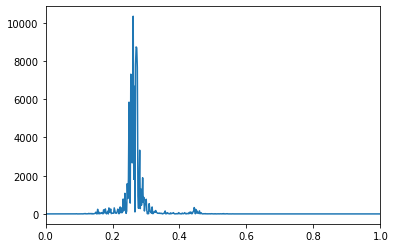

0.2616690240452617


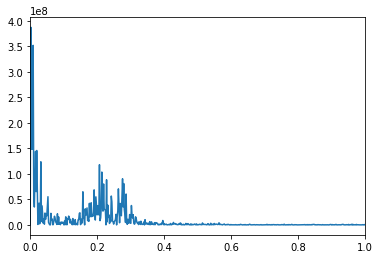

0.001768033946251768


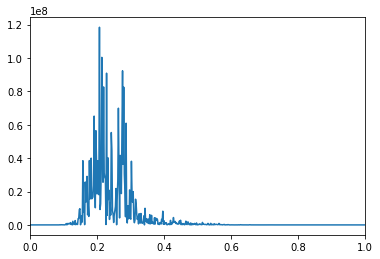

0.20685997171145684


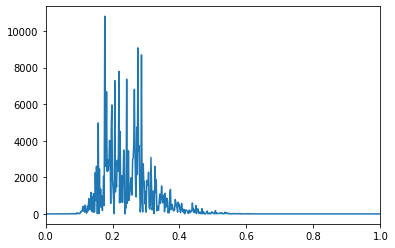

0.1768033946251768


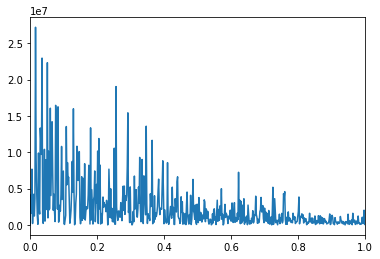

0.01591230551626591


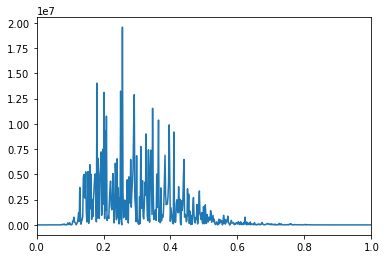

0.25636492220650636


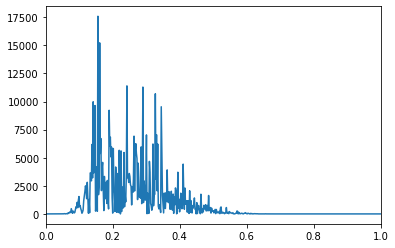

0.1555869872701556


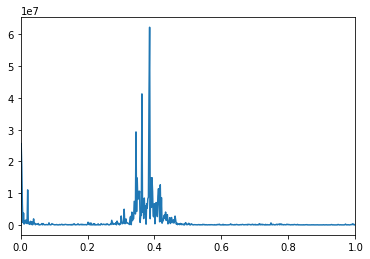

0.3854314002828854


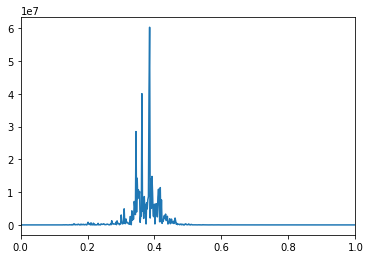

0.3854314002828854


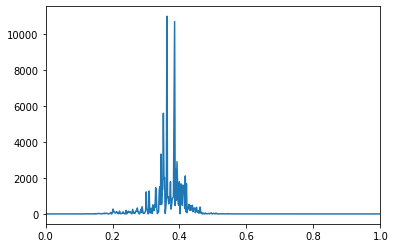

0.36244695898161244


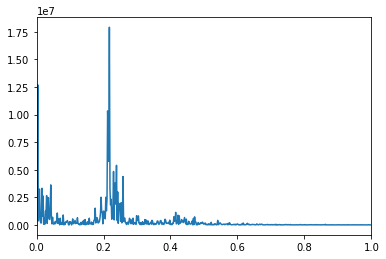

0.21746817538896746


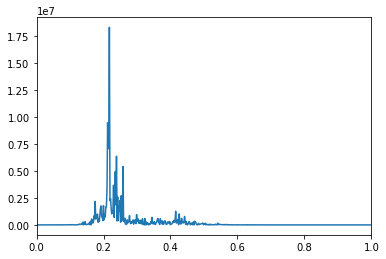

0.21746817538896746


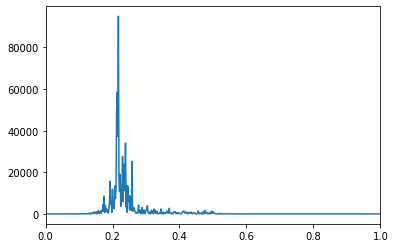

0.21746817538896748


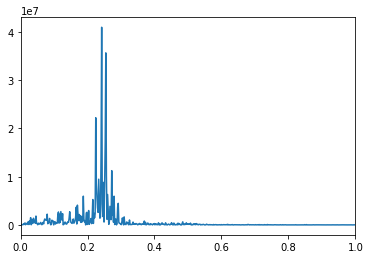

0.2422206506364922


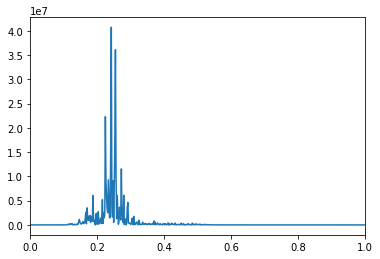

0.2422206506364922


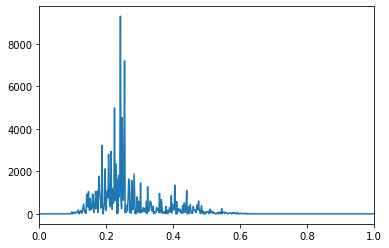

0.24222065063649223


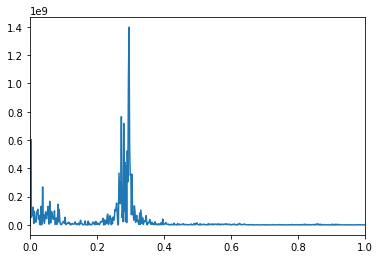

0.29526166902404527


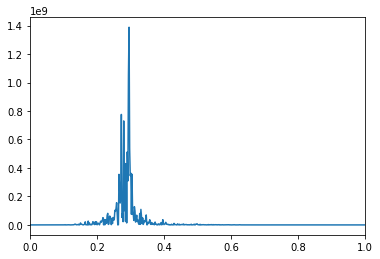

0.29526166902404527


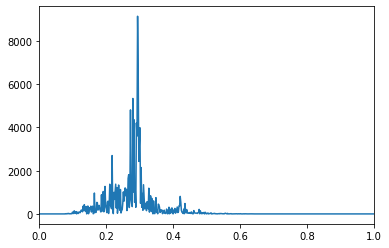

0.2934936350777935


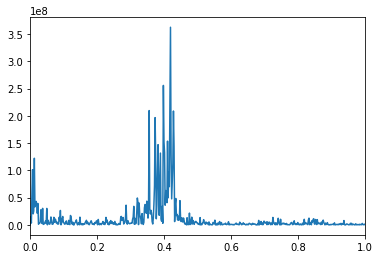

0.419024045261669


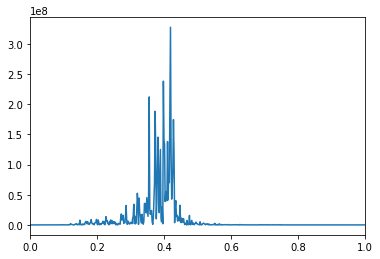

0.419024045261669


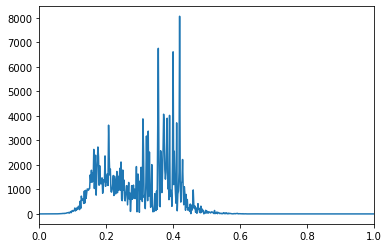

0.41902404526166903


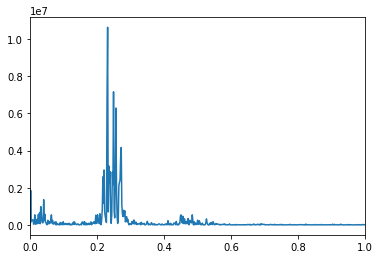

0.2316124469589816


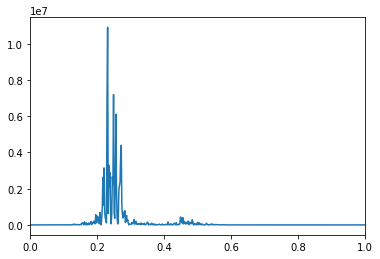

0.2316124469589816


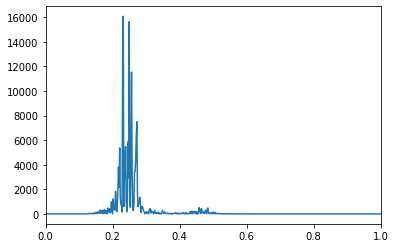

0.23161244695898162


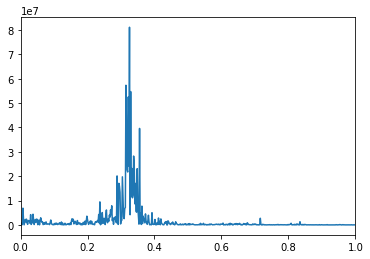

0.3253182461103253


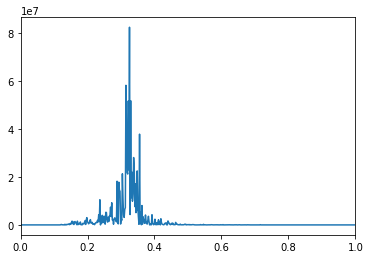

0.3253182461103253


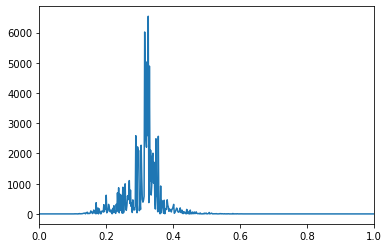

0.32531824611032534


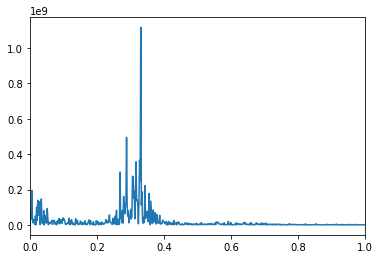

0.33062234794908063


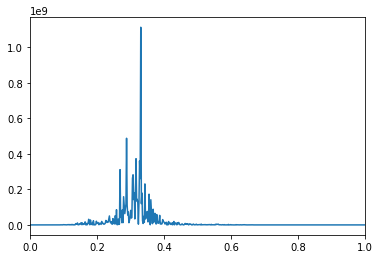

0.33062234794908063


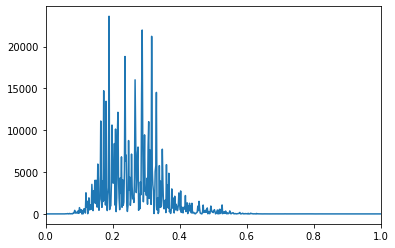

0.1891796322489392


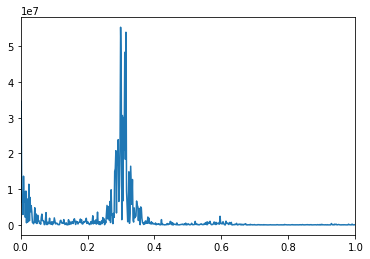

0.29879773691654876


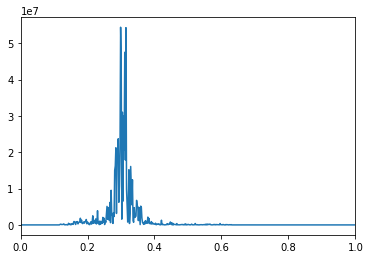

0.29879773691654876


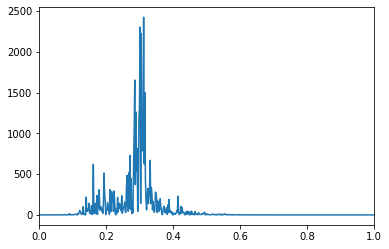

0.3111739745403112


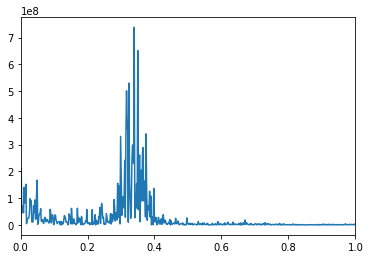

0.3394625176803394


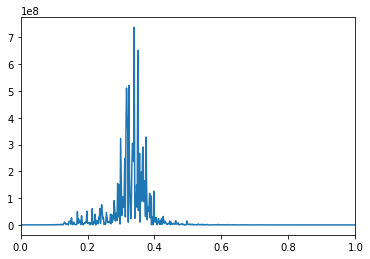

0.3394625176803394


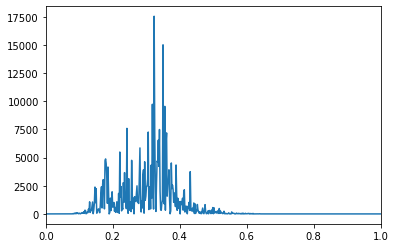

0.3235502121640736


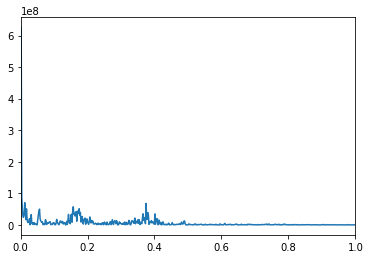

0.001768033946251768


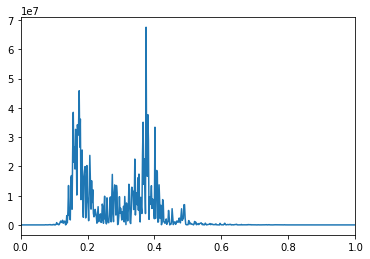

0.3748231966053748


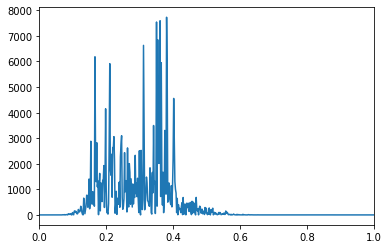

0.3801272984441302


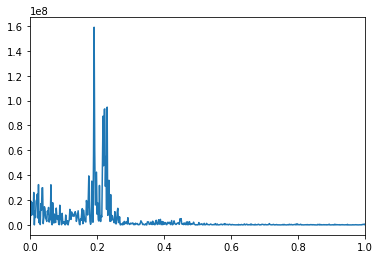

0.19094766619519093


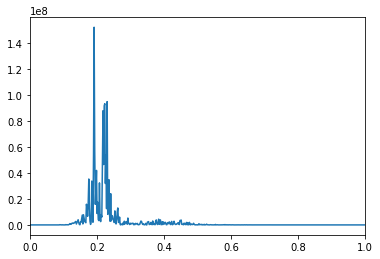

0.19094766619519093


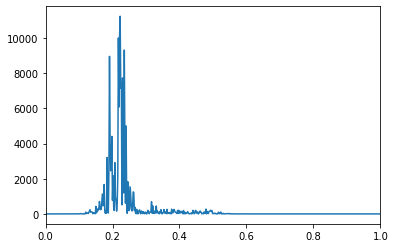

0.22277227722772278


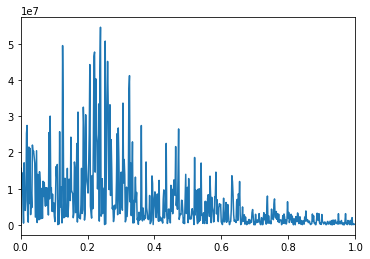

0.23868458274398868


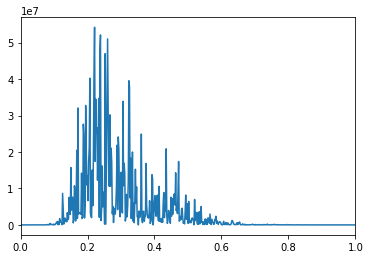

0.221004243281471


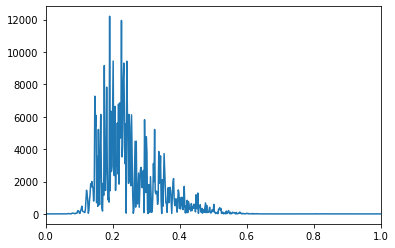

0.19094766619519096


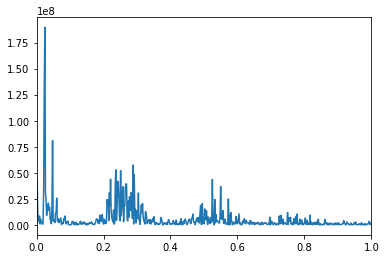

0.02475247524752475


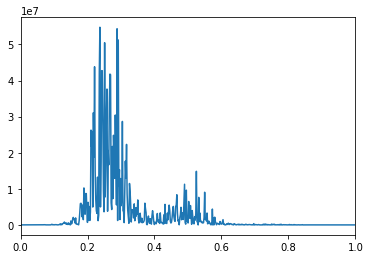

0.2369165487977369


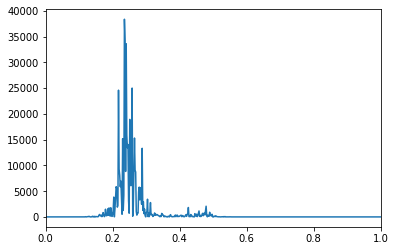

0.23514851485148516


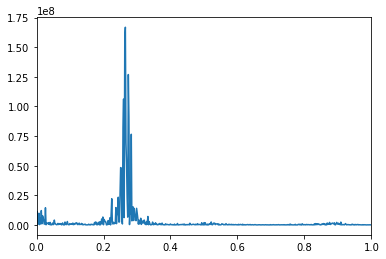

0.2652050919377652


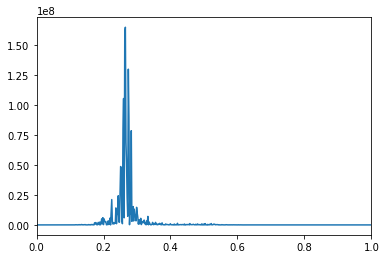

0.2652050919377652


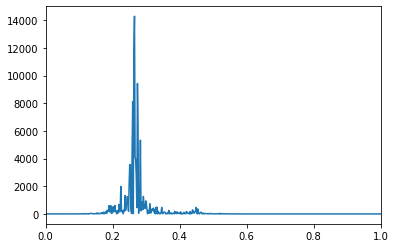

0.2652050919377652


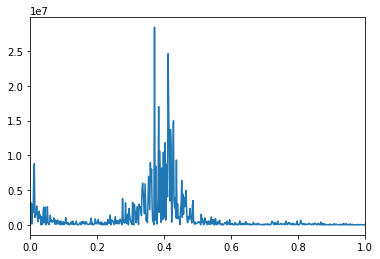

0.3712871287128713


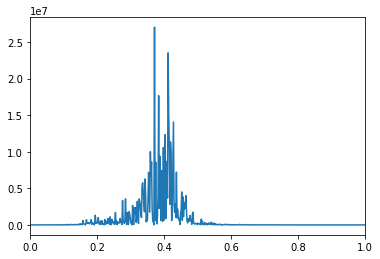

0.3712871287128713


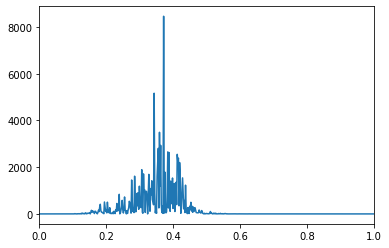

0.3712871287128713


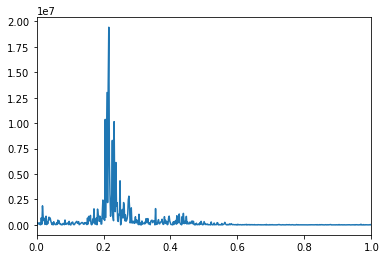

0.21570014144271568


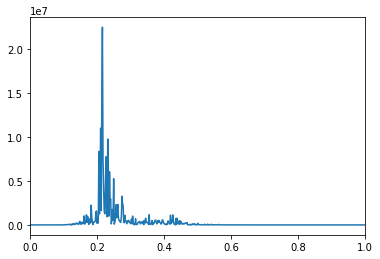

0.21570014144271568


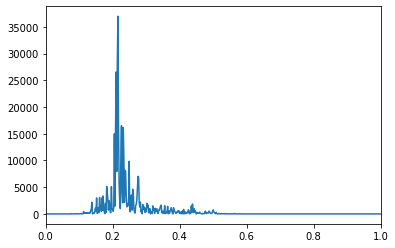

0.2157001414427157


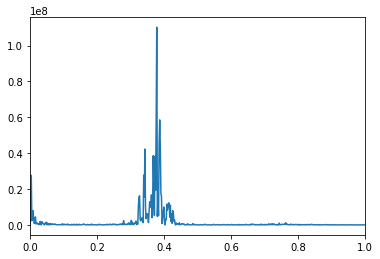

0.3783592644978783


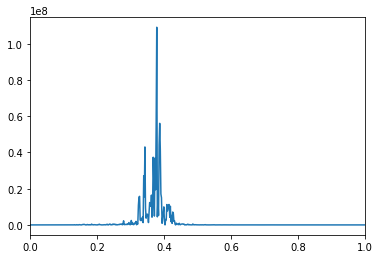

0.3783592644978783


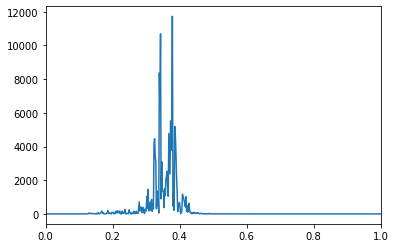

0.3783592644978784


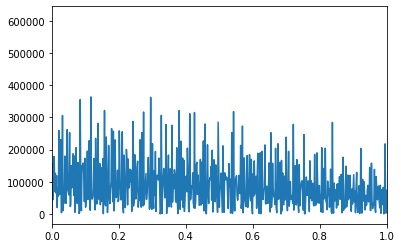

25.0


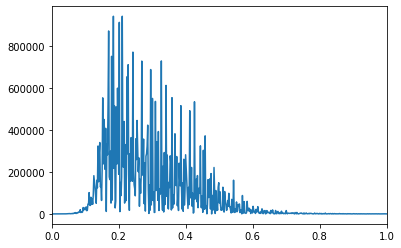

0.2103960396039604


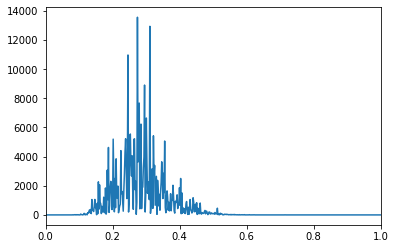

0.27404526166902404


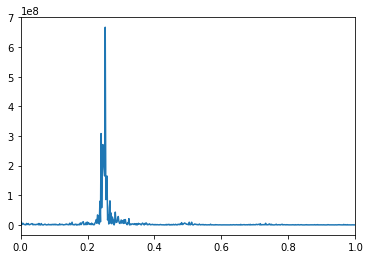

0.2528288543140028


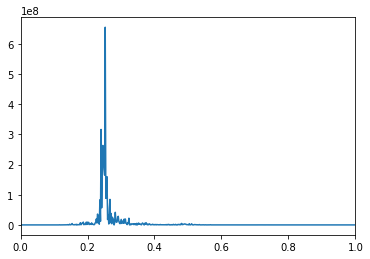

0.2528288543140028


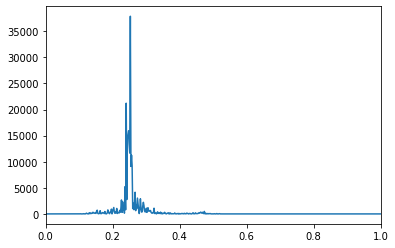

0.25282885431400287


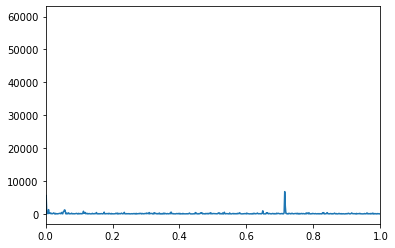

26.07142857142857


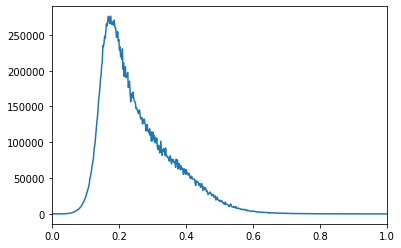

0.17503536067892503


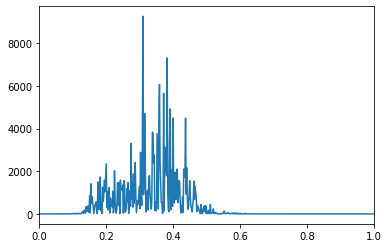

0.3094059405940594


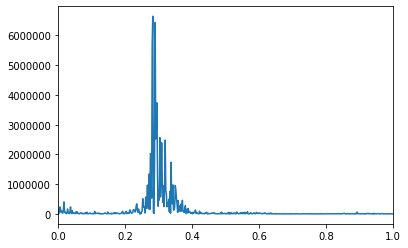

0.2828854314002829


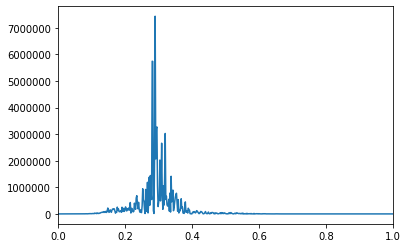

0.2899575671852899


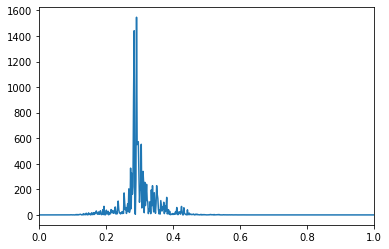

0.28995756718529


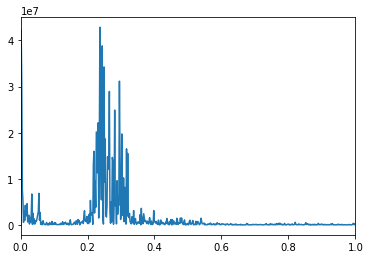

0.2369165487977369


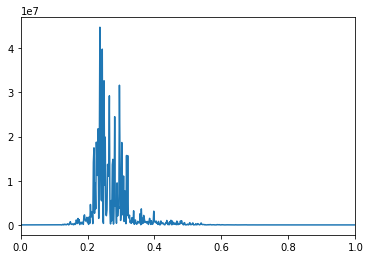

0.2369165487977369


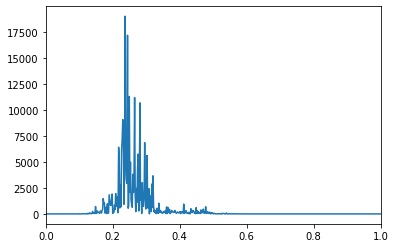

0.23691654879773694


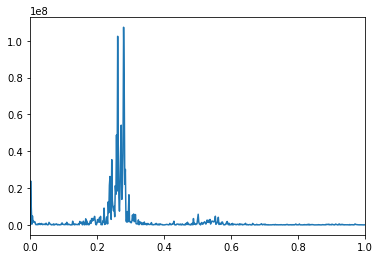

0.27934936350777934


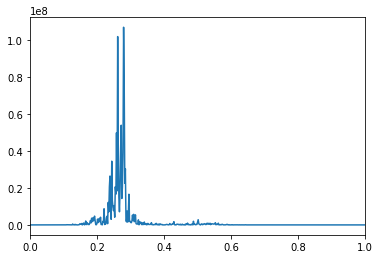

0.27934936350777934


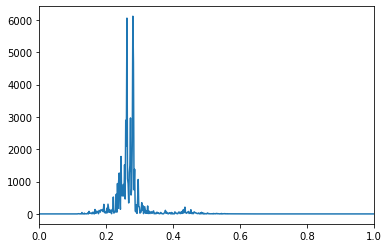

0.2793493635077794


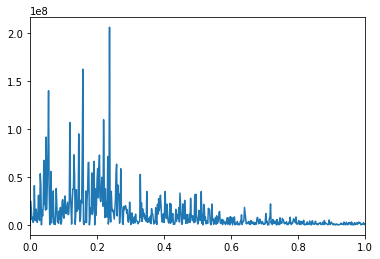

0.2369165487977369


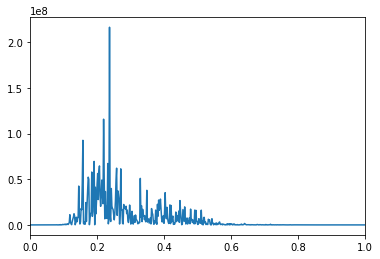

0.2369165487977369


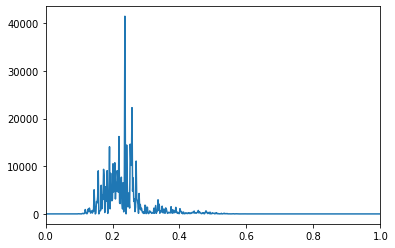

0.23691654879773694


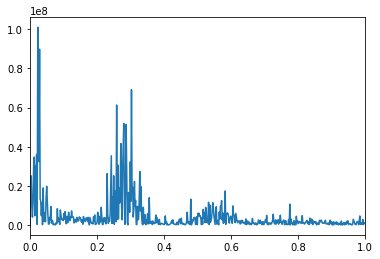

0.023026129343082243


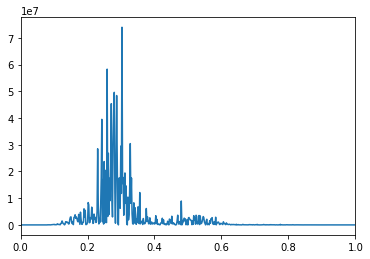

0.30288216289746644


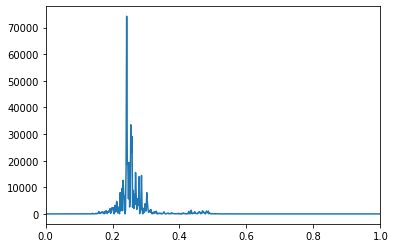

0.24222065063649223


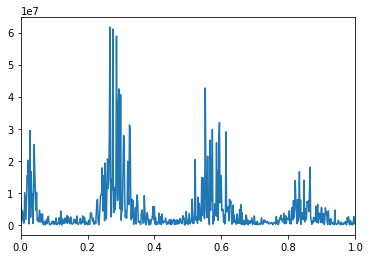

0.26697312588401695


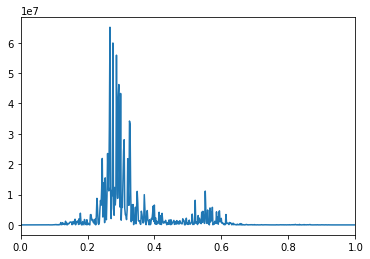

0.26697312588401695


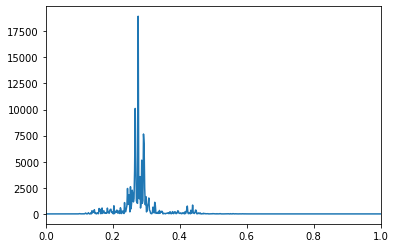

0.27581329561527584


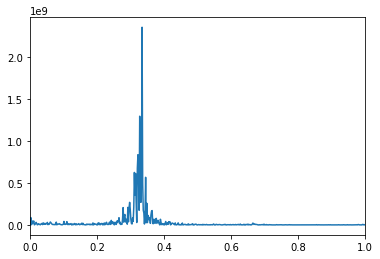

0.3341584158415841


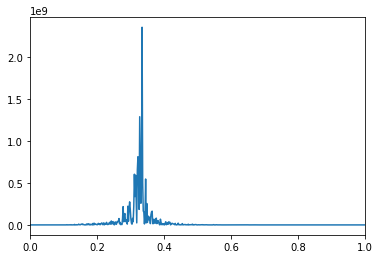

0.3341584158415841


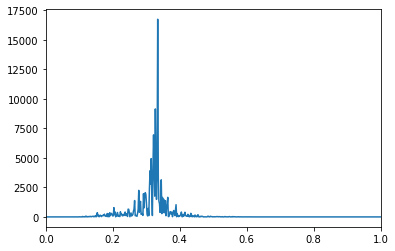

0.3341584158415842


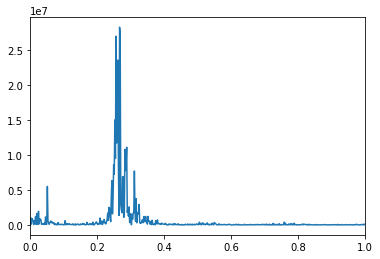

0.26697312588401695


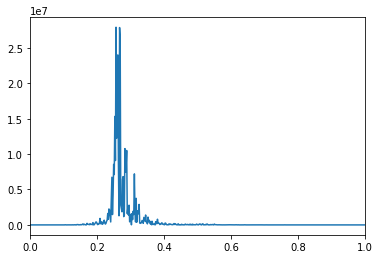

0.25636492220650636


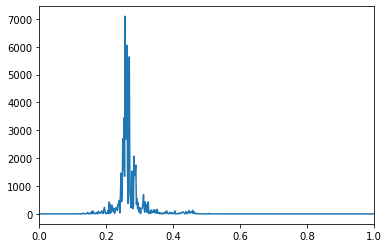

0.25636492220650636


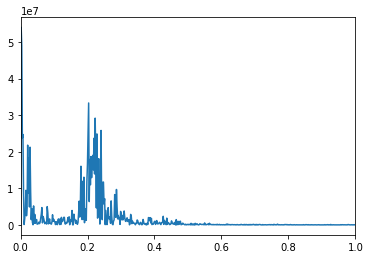

0.001768033946251768


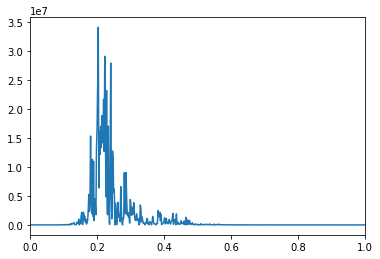

0.20332390381895332


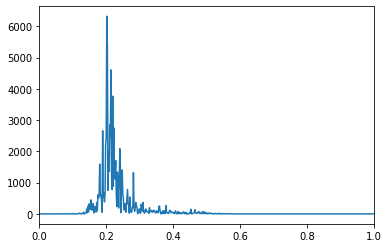

0.20155586987270158


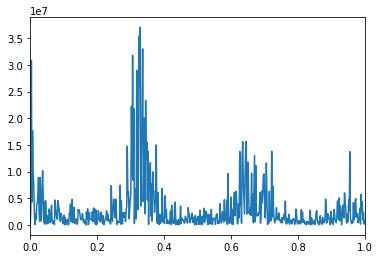

0.32885431400282883


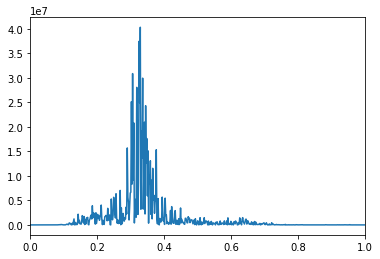

0.32885431400282883


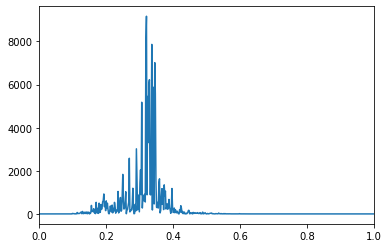

0.32001414427157004


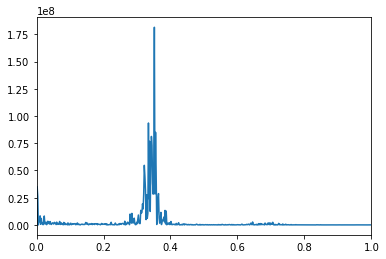

0.3518387553041018


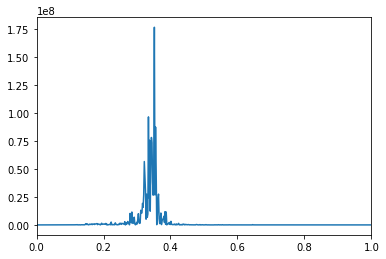

0.3518387553041018


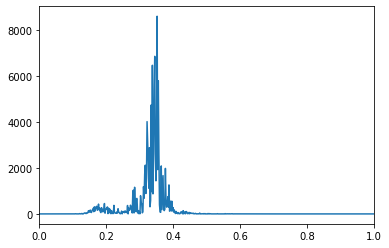

0.35183875530410186


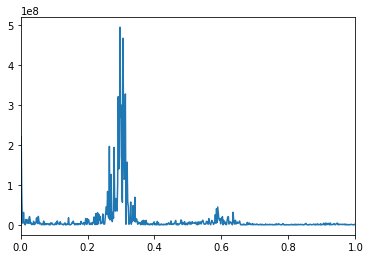

0.297029702970297


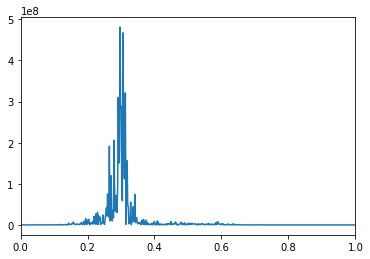

0.297029702970297


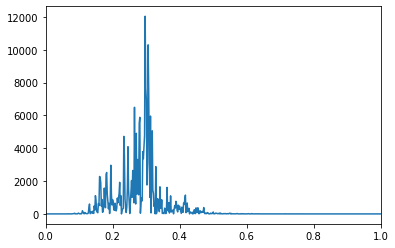

0.29702970297029707


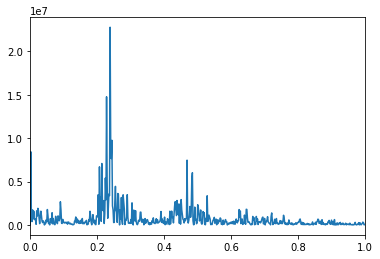

0.23868458274398868


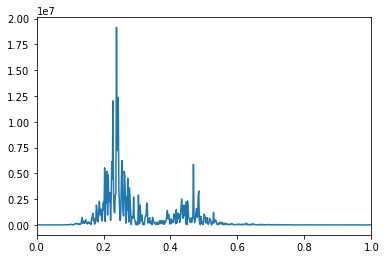

0.23868458274398868


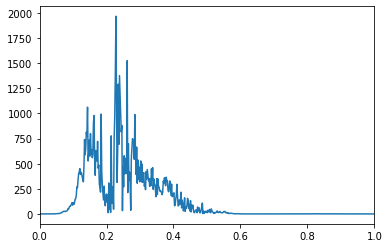

0.2280763790664781


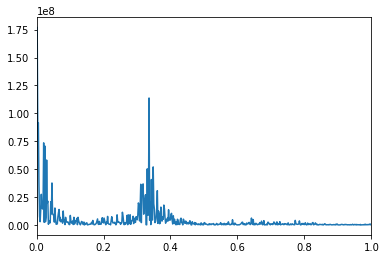

0.001768033946251768


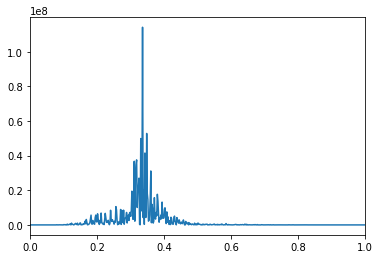

0.3359264497878359


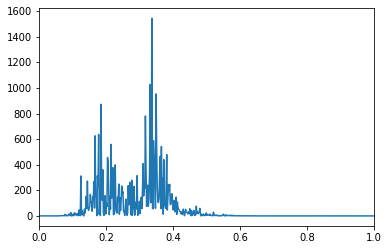

0.3359264497878359


FileNotFoundError: [Errno 2] No such file or directory: '/projects/public_warehouse/bids_warehouse/sub-A00060431/ses-BAS1/func/sub-A00060431_ses-BAS1_task-rest_acq-1400_physio.json'

In [15]:
correlations = []
for file in paths:
    filtered = get_file(file)
    a_number, session, task, imtype = file.name.split("_")[:4]
    phys_path, json_path = get_file_info(file)
    resp = get_resp(phys_path, json_path, 35350)
    max_freq = extract_max_freq(resp - resp.mean(), 62.5); print(max_freq)
    filtered_freq = filter_frequency(resp)
    max_freq = extract_max_freq(filtered_freq, 62.5); print(max_freq)
    resp_resampled = downsample_resp(filtered_freq, len(filtered))
    filt_movement = butter_bandpass_filter(filtered[:, -1], 0.15, 0.5, 1/0.0875)
    max_freq = extract_max_freq(filt_movement, 1/0.0875); print(max_freq)
    cor = np.corrcoef(resp_resampled, filt_movement)[0,1]
    cor_dict = {
        "a_number":a_number,
        "session":session,
        "task":task,
        "imtype":imtype,
        "cor":cor
    }
    correlations.append(cor_dict)

In [17]:
df = pd.DataFrame(correlations)

In [22]:
df["cor"] = -df.cor

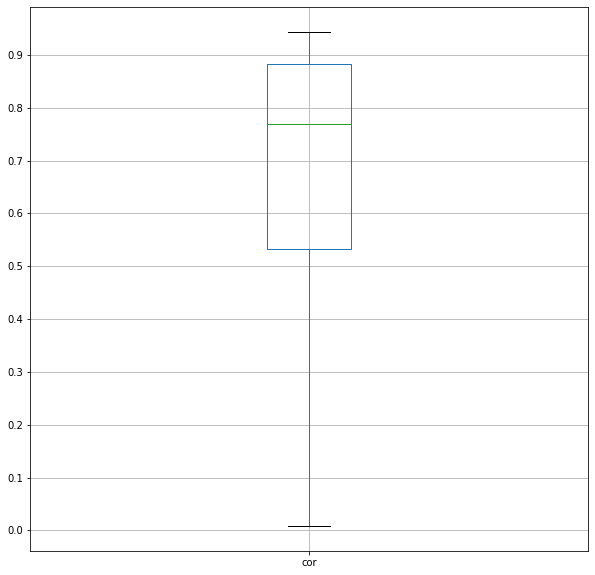

In [27]:
fig,ax = plt.subplots(figsize=(10,10))
df.boxplot("cor", showfliers=False, figsize=(10,10), ax=ax)
plt.yticks(np.arange(0, 1, 0.1))
plt.show()

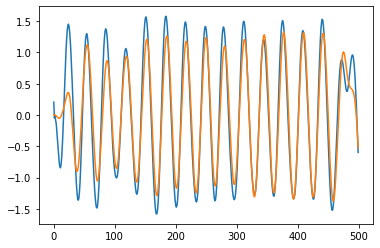

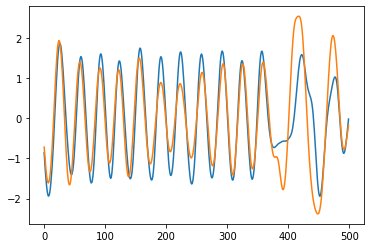

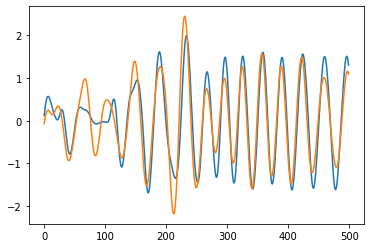

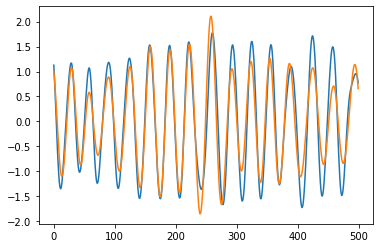

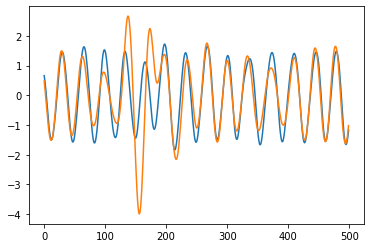

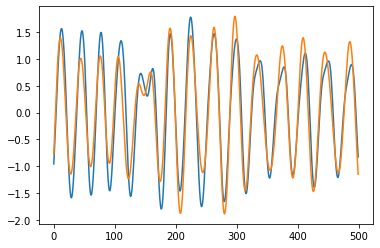

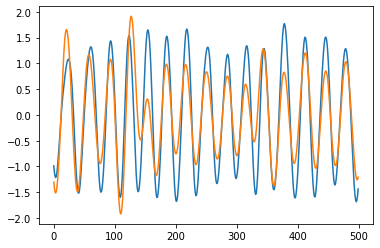

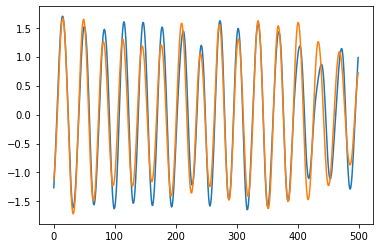

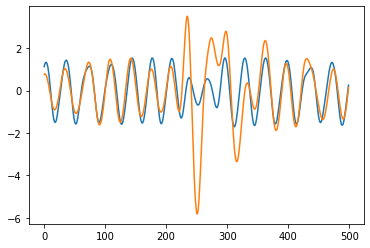

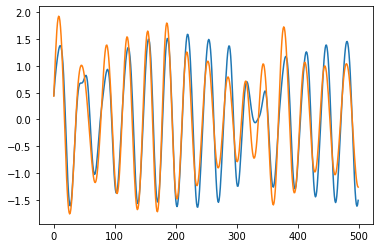

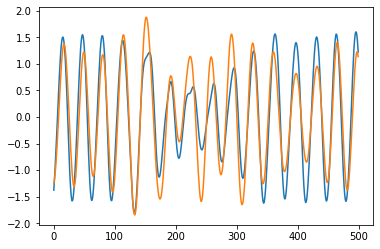

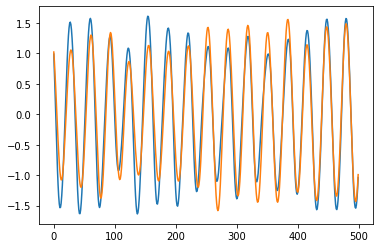

In [161]:
from scipy.signal import detrend
from scipy.stats import zscore
z_resp_resampled = zscore(resp_resampled)
z_filtered = -detrend(zscore(filt_movement))
step = 500
for i in range(12):
    
    plt.plot(z_resp_resampled[step*i:(step*i)+step])
    plt.plot(z_filtered[step*i:(step*i)+step])
    plt.show()

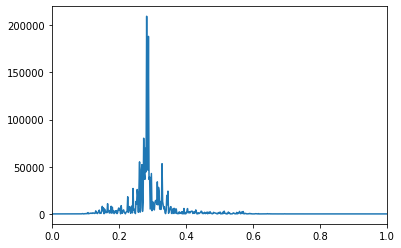

0.2828854314002829


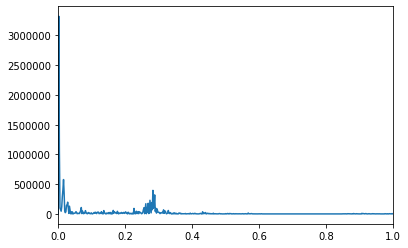

0.0017680339462517681


In [110]:
max_freq = extract_max_freq(resp_resampled, 1/0.0875); print(max_freq)
max_freq = extract_max_freq(z_filtered, 1/0.0875); print(max_freq)

(1000, 2000)

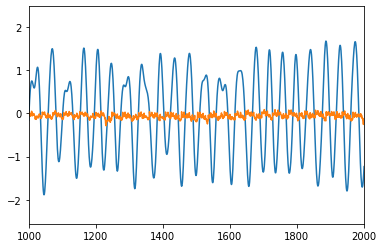

In [58]:
plt.plot(resp_resampled)
plt.plot(filtered[:, -1])
plt.xlim(1000, 2000)

In [ ]:
file = next(paths)
filtered = get_file(file)
phys_path, json_path = get_file_info(file)
resp = get_resp(phys_path, json_path)
resp_resampled = downsample_resp(resp, len(filtered))
df = pd.DataFrame(np.concatenate((resp_resampled.reshape((-1, 1)).T, detrend(filtered, 1).T)).T)
df.columns = ["resp", "roll", "pitch", "yaw", "dS", "dL", "dP"]
print(df.corr())

In [ ]:
np.concatenate((resp_resampled.reshape((-1, 1)).T, detrend(filtered, 1).T)).T.shape

In [ ]:
pd.DataFrame(np.concatenate((resp_resampled.reshape((-1, 1)).T, detrend(filtered, 1).T)).T)

In [ ]:
plt.plot(filtered[:100, -1])

In [ ]:
from scipy.signal import detrend
from scipy.stats import zscore
z_resp_resampled = zscore(resp_resampled)
z_filtered = -detrend(zscore(filtered)[:, -1])
step = 500
for i in range(12):
    
    plt.plot(z_resp_resampled[step*i:(step*i)+step])
    plt.plot(z_filtered[step*i:(step*i)+step])
    plt.show()

In [ ]:
np.corrcoef(detrend(filtered[:1000, -1]), resp_resampled[:1000])

In [ ]:
#fire correl_physio
def correl_physio(file):
    filtered = get_file(file)
    phys_path, json_path = get_file_info(file)
    resp = get_resp(phys_path, json_path)
    resp_resampled = downsample_resp(resp, len(filtered))
    df = pd.DataFrame(np.concatenate((resp_resampled.reshape((-1, 1)).T, filtered.T)).T)
    df.columns = ["resp", "roll", "pitch", "yaw", "dS", "dL", "dP"]
    print(df.corr())

In [ ]:
resp = np.genfromtxt(phys_path)[:, j["Columns"].index("respiratory")][:(6464*5)]

In [ ]:
resp = resp.reshape((len(filtered), -1)), 1)

In [ ]:
#import
from scipy import signal
import matplotlib.pyplot as plt

In [ ]:
resp_resampled = signal.resample(resp, len(filtered))

In [ ]:
plt.plot(resp_resampled[:500])
plt.plot(filtered[:500, 5])

In [ ]:
np.corrcoef(np.concatenate((resp_resampled.reshape((-1, 1)).T, filtered.T)))

In [ ]:
df = pd.DataFrame(np.concatenate((resp_resampled.reshape((-1, 1)).T, filtered.T)).T)

In [ ]:
df.columns = ["resp", "roll", "pitch", "yaw", "dS", "dL", "dP"]

In [ ]:
df.corr()